Mounting Drive

Importing the libraries

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Importing the dataset

In [6]:
cases_msia = pd.read_csv('cases_malaysia.csv')
cases_state = pd.read_csv('cases_state.csv')
clusters = pd.read_csv('clusters.csv')
tests_msia = pd.read_csv('tests_malaysia.csv')
tests_state = pd.read_csv('tests_state.csv')
df_msia = pd.read_csv('df_msia.csv')
boruta_rank = pd.read_csv('boruta_rank.csv')
rfe_rank = pd.read_csv('rfe_rank.csv')

#Data Preprocessing



## Checking Data Types

either drop death_bid missing value
or fill with median

In [7]:
cases_msia.name = 'cases_msia'
cases_state.name = 'cases_state'
clusters.name = 'clusters'
tests_msia.name = 'tests_msia'
tests_state.name = 'tests_state'
csv_list = [cases_msia, tests_msia, cases_state, tests_state, clusters]

for x in csv_list:
  print(x.name)

cases_msia
tests_msia
cases_state
tests_state
clusters


In [8]:
for x in csv_list:
  print(x.name)
  print(x.dtypes)
  print("------------------")

cases_msia
date                        object
cases_new                    int64
cases_import                 int64
cases_recovered              int64
cluster_import             float64
cluster_religious          float64
cluster_community          float64
cluster_highRisk           float64
cluster_education          float64
cluster_detentionCentre    float64
cluster_workplace          float64
dtype: object
------------------
tests_msia
date      object
rtk-ag     int64
pcr        int64
dtype: object
------------------
cases_state
date                object
state               object
cases_new            int64
cases_import         int64
cases_recovered    float64
dtype: object
------------------
tests_state
date      object
state     object
rtk-ag     int64
pcr        int64
dtype: object
------------------
clusters
cluster            object
state              object
district           object
date_announced     object
date_last_onset    object
category           object
status            

## Change date object to datetime

In [9]:
for x in csv_list:
  try:
    x['date'] = pd.to_datetime(x['date'],errors='coerce')
  except:
    x['date_announced'] = pd.to_datetime(x['date_announced'],errors='coerce')
    x['date_last_onset'] = pd.to_datetime(x['date_last_onset'],errors='coerce')

## Check For Missing Data

In [10]:
for x in csv_list:
  print(x.name)
  print("============")
  print(x.isna().sum())
  print("\n")

cases_msia
date                         0
cases_new                    0
cases_import                 0
cases_recovered              0
cluster_import             342
cluster_religious          342
cluster_community          342
cluster_highRisk           342
cluster_education          342
cluster_detentionCentre    342
cluster_workplace          342
dtype: int64


tests_msia
date      0
rtk-ag    0
pcr       0
dtype: int64


cases_state
date                 0
state                0
cases_new            0
cases_import         0
cases_recovered    128
dtype: int64


tests_state
date      0
state     0
rtk-ag    0
pcr       0
dtype: int64


clusters
cluster            0
state              0
district           0
date_announced     0
date_last_onset    0
category           0
status             0
cases_new          0
cases_total        0
cases_active       0
tests              0
icu                0
deaths             0
recovered          0
dtype: int64




Handling Missing Data of cases_msia

The clusters column were empty from 25/1/2020 until 31/12/2020. We think that it is empty because the cluster couldn't be identified at that stage of pandemic hence we decided to fill zeros in it

In [11]:
cases_msia.fillna(0 ,inplace = True)

Handling Missing Data of cases_state

We realize that only a 8 days of recovered cases is missing, hence we procceed by entering the missing data manually. However we cant find the records by state on the 8 days,thus, we will fill it with 0


In [12]:
cases_state.fillna(0 ,inplace = True)

In [13]:
# alltgt = pd.merge(alltgt,hospital,how='outer', left_on=['date','state'], right_on= ['date','state'])
# alltgt = pd.merge(alltgt,icu,how='outer', left_on=['date','state'], right_on= ['date','state'])
# alltgt = pd.merge(alltgt,death_state,how='outer', left_on=['date','state'], right_on= ['date','state'])
# #alltgt = pd.merge(alltgt,tests_state,how='outer', left_on=['date','state'], right_on= ['date','state'])
# alltgt

#Exploratory Data Analysis

## Shape of the dataset

In [14]:
for x in csv_list:
  print(x.name)
  print(x.shape)
  print('\n')


cases_msia
(589, 11)


tests_msia
(588, 3)


cases_state
(9424, 5)


tests_state
(368, 4)


clusters
(4854, 14)




In [15]:
for x in csv_list:
  print(x.name)
  print(x.columns)
  print('\n')

cases_msia
Index(['date', 'cases_new', 'cases_import', 'cases_recovered',
       'cluster_import', 'cluster_religious', 'cluster_community',
       'cluster_highRisk', 'cluster_education', 'cluster_detentionCentre',
       'cluster_workplace'],
      dtype='object')


tests_msia
Index(['date', 'rtk-ag', 'pcr'], dtype='object')


cases_state
Index(['date', 'state', 'cases_new', 'cases_import', 'cases_recovered'], dtype='object')


tests_state
Index(['date', 'state', 'rtk-ag', 'pcr'], dtype='object')


clusters
Index(['cluster', 'state', 'district', 'date_announced', 'date_last_onset',
       'category', 'status', 'cases_new', 'cases_total', 'cases_active',
       'tests', 'icu', 'deaths', 'recovered'],
      dtype='object')




## What is the difference of covid trend in 2020 and 2021 ?

In [16]:
import datetime

In [17]:
cases_msia['day'] = cases_msia['date'].dt.day
cases_msia['month'] = cases_msia['date'].dt.month
cases_msia['year'] = cases_msia['date'].dt.year

In [18]:
year2020 = cases_msia['year'] == 2020
cases_msia_2020 = cases_msia[year2020] 
cases_msia_2020

date  cases_new  cases_import  cases_recovered  cluster_import  \
0   2020-01-25          4             4                0             0.0   
1   2020-01-26          0             0                0             0.0   
2   2020-01-27          0             0                0             0.0   
3   2020-01-28          0             0                0             0.0   
4   2020-01-29          3             3                0             0.0   
..         ...        ...           ...              ...             ...   
337 2020-12-27       1196             5              997             0.0   
338 2020-12-28       1596             3             1181             0.0   
339 2020-12-29       1923            10             1123             0.0   
340 2020-12-30       1870             2              745             0.0   
341 2020-12-31       2525            13             1481             0.0   

     cluster_religious  cluster_community  cluster_highRisk  \
0                  0.0                0.0               0.0   
1                  0.0                0.0               0.0   
2                  0.0                0.0               0.0   
3                  0.0                0.0               0.0   
4                  0.0                0.0               0.0   
..                 ...                ...               ...   
337                0.0                0.0               0.0   
338                0.0                0.0               0.0   
339                0.0                0.0               0.0   
340                0.0                0.0               0.0   
341                0.0                0.0               0.0   

     cluster_education  cluster_detentionCentre  cluster_workplace  day  \
0                  0.0                      0.0                0.0   25   
1                  0.0                      0.0                0.0   26   
2                  0.0                      0.0                0.0   27   
3                  0.0                      0.0                0.0   28   
4                  0.0                      0.0                0.0   29   
..                 ...                      ...                ...  ...   
337                0.0                      0.0                0.0   27   
338                0.0                      0.0                0.0   28   
339                0.0                      0.0                0.0   29   
340                0.0                      0.0                0.0   30   
341                0.0                      0.0                0.0   31   

     month  year  
0        1  2020  
1        1  2020  
2        1  2020  
3        1  2020  
4        1  2020  
..     ...   ...  
337     12  2020  
338     12  2020  
339     12  2020  
340     12  2020  
341     12  2020  

[342 rows x 14 columns]

In [19]:
year2021 = cases_msia['year'] == 2021
cases_msia_2021 = cases_msia[year2021]
cases_msia_2021

date  cases_new  cases_import  cases_recovered  cluster_import  \
342 2021-01-01       2068             2             2230             0.0   
343 2021-01-02       2295             9             3321             0.0   
344 2021-01-03       1704             5             2726             0.0   
345 2021-01-04       1741             8             1010             0.0   
346 2021-01-05       2027            16             1221             0.0   
..         ...        ...           ...              ...             ...   
584 2021-08-31      20897             1            18465             0.0   
585 2021-09-01      18762             5            21073             0.0   
586 2021-09-02      20988             1            23473             0.0   
587 2021-09-03      19378            14            22399             0.0   
588 2021-09-04      19057            10            21582             0.0   

     cluster_religious  cluster_community  cluster_highRisk  \
342                0.0               35.0              17.0   
343                2.0               30.0              33.0   
344                0.0               41.0              25.0   
345                0.0               47.0               7.0   
346                0.0               30.0              14.0   
..                 ...                ...               ...   
584                1.0              260.0              38.0   
585                3.0              515.0              42.0   
586                5.0              351.0             112.0   
587                5.0              562.0              64.0   
588                4.0              250.0               8.0   

     cluster_education  cluster_detentionCentre  cluster_workplace  day  \
342                0.0                     18.0              671.0    1   
343                0.0                    135.0              882.0    2   
344                0.0                     83.0              432.0    3   
345                0.0                     37.0              518.0    4   
346                0.0                    111.0              590.0    5   
..                 ...                      ...                ...  ...   
584               11.0                     43.0              734.0   31   
585               16.0                     23.0             1109.0    1   
586               52.0                     81.0             1110.0    2   
587               12.0                    102.0             1191.0    3   
588              100.0                     54.0              886.0    4   

     month  year  
342      1  2021  
343      1  2021  
344      1  2021  
345      1  2021  
346      1  2021  
..     ...   ...  
584      8  2021  
585      9  2021  
586      9  2021  
587      9  2021  
588      9  2021  

[247 rows x 14 columns]

In [20]:
import calendar

In [21]:
cases_msia_2020_byMth = cases_msia_2020.groupby(['month'])['cases_new'].sum().reset_index()
cases_msia_2020_byMth['month'] = cases_msia_2020_byMth['month'] .apply(lambda x: calendar.month_name[x])
cases_msia_2020_byMth

month  cases_new
0     January          8
1    February         21
2       March       2737
3       April       3236
4         May       1817
5        June        811
6        July        346
7      August        364
8   September       1884
9     October      20324
10   November      34149
11   December      47313

In [22]:
cases_msia_2021_byMth = cases_msia_2021.groupby(['month'])['cases_new'].sum().reset_index()
cases_msia_2021_byMth['month'] = cases_msia_2021_byMth['month'] .apply(lambda x: calendar.month_name[x])
cases_msia_2021_byMth = cases_msia_2021_byMth.append([{'month' : 'October'},{'month' : 'November'},{'month' : 'December'}], ignore_index = True)

In [23]:
cases_msia_2021_byMth

month  cases_new
0     January   101949.0
1    February    85793.0
2       March    44748.0
3       April    63213.0
4         May   163644.0
5        June   179622.0
6        July   361293.0
7      August   632982.0
8   September    78185.0
9     October        NaN
10   November        NaN
11   December        NaN

In [24]:
cases_varies = cases_msia_2020_byMth.merge(cases_msia_2021_byMth,on='month')
cases_varies.columns = ['Month','Year 2020 Cases','Year 2021 Cases']
cases_varies

Month  Year 2020 Cases  Year 2021 Cases
0     January                8         101949.0
1    February               21          85793.0
2       March             2737          44748.0
3       April             3236          63213.0
4         May             1817         163644.0
5        June              811         179622.0
6        July              346         361293.0
7      August              364         632982.0
8   September             1884          78185.0
9     October            20324              NaN
10   November            34149              NaN
11   December            47313              NaN

In [25]:
cases_melt = cases_varies.melt(id_vars='Month',value_vars=['Year 2020 Cases','Year 2021 Cases'])
cases_melt

Month         variable     value
0     January  Year 2020 Cases       8.0
1    February  Year 2020 Cases      21.0
2       March  Year 2020 Cases    2737.0
3       April  Year 2020 Cases    3236.0
4         May  Year 2020 Cases    1817.0
5        June  Year 2020 Cases     811.0
6        July  Year 2020 Cases     346.0
7      August  Year 2020 Cases     364.0
8   September  Year 2020 Cases    1884.0
9     October  Year 2020 Cases   20324.0
10   November  Year 2020 Cases   34149.0
11   December  Year 2020 Cases   47313.0
12    January  Year 2021 Cases  101949.0
13   February  Year 2021 Cases   85793.0
14      March  Year 2021 Cases   44748.0
15      April  Year 2021 Cases   63213.0
16        May  Year 2021 Cases  163644.0
17       June  Year 2021 Cases  179622.0
18       July  Year 2021 Cases  361293.0
19     August  Year 2021 Cases  632982.0
20  September  Year 2021 Cases   78185.0
21    October  Year 2021 Cases       NaN
22   November  Year 2021 Cases       NaN
23   December  Year 2021 Cases       NaN

In [26]:
import plotly.express as px

In [27]:
px.line(cases_melt,x='Month',y = 'value',title='Cases of 2020 vs Cases of 2021',color='variable')

## Trend of different cluster type in 2021

In [28]:
cases_msia_2021
value = ['cluster_import',	'cluster_religious',	'cluster_community',	'cluster_highRisk',	'cluster_education',	'cluster_detentionCentre',	'cluster_workplace']

t = cases_msia_2021.groupby(['month'])['cluster_import',	'cluster_religious',	'cluster_community',	'cluster_highRisk',	'cluster_education',	'cluster_detentionCentre',	'cluster_workplace'].sum().reset_index()
t_cases_melt = t.melt(id_vars='month',value_vars=['cluster_import',	'cluster_religious',	'cluster_community',	'cluster_highRisk',	'cluster_education',	'cluster_detentionCentre',	'cluster_workplace'])
t_cases_melt

C:\Users\kelvi\AppData\Local\Temp/ipykernel_14752/3084184639.py:4: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



month           variable    value
0       1     cluster_import      0.0
1       2     cluster_import      0.0
2       3     cluster_import     17.0
3       4     cluster_import      4.0
4       5     cluster_import     19.0
..    ...                ...      ...
58      5  cluster_workplace  11885.0
59      6  cluster_workplace  28251.0
60      7  cluster_workplace  40746.0
61      8  cluster_workplace  38086.0
62      9  cluster_workplace   4296.0

[63 rows x 3 columns]

In [29]:
px.line(t_cases_melt,x='month',y = 'value',title='Cluster Trend',color='variable')

## EDA Question


In [30]:
cases_state['day'] = cases_state['date'].dt.day
cases_state['month'] = cases_state['date'].dt.month
cases_state['year'] = cases_state['date'].dt.year

In [31]:
cases_state

date              state  cases_new  cases_import  cases_recovered  \
0    2020-01-25              Johor          4             4              0.0   
1    2020-01-25              Kedah          0             0              0.0   
2    2020-01-25           Kelantan          0             0              0.0   
3    2020-01-25             Melaka          0             0              0.0   
4    2020-01-25    Negeri Sembilan          0             0              0.0   
...         ...                ...        ...           ...              ...   
9419 2021-09-04           Selangor       3775             7              0.0   
9420 2021-09-04         Terengganu        605             0              0.0   
9421 2021-09-04  W.P. Kuala Lumpur        711             1              0.0   
9422 2021-09-04        W.P. Labuan          9             0              0.0   
9423 2021-09-04     W.P. Putrajaya         18             0              0.0   

      day  month  year  
0      25      1  2020  
1      25      1  2020  
2      25      1  2020  
3      25      1  2020  
4      25      1  2020  
...   ...    ...   ...  
9419    4      9  2021  
9420    4      9  2021  
9421    4      9  2021  
9422    4      9  2021  
9423    4      9  2021  

[9424 rows x 8 columns]

In [32]:
cases_state_sum = cases_state.groupby(['state'])['cases_new'].sum().reset_index()
cases_state_sum

state  cases_new
0               Johor     147193
1               Kedah     105881
2            Kelantan      83067
3              Melaka      50011
4     Negeri Sembilan      92580
5              Pahang      46416
6               Perak      72821
7              Perlis       2256
8        Pulau Pinang      93137
9               Sabah     157285
10            Sarawak     127151
11           Selangor     619167
12         Terengganu      36122
13  W.P. Kuala Lumpur     175994
14        W.P. Labuan       9830
15     W.P. Putrajaya       5528

In [33]:
state2020 = cases_state['year'] == 2020
cases_state_2020 = cases_state[state2020] 
cases_state_2020

date              state  cases_new  cases_import  cases_recovered  \
0    2020-01-25              Johor          4             4              0.0   
1    2020-01-25              Kedah          0             0              0.0   
2    2020-01-25           Kelantan          0             0              0.0   
3    2020-01-25             Melaka          0             0              0.0   
4    2020-01-25    Negeri Sembilan          0             0              0.0   
...         ...                ...        ...           ...              ...   
5467 2020-12-31           Selangor       1205             0            957.0   
5468 2020-12-31         Terengganu         17             0              1.0   
5469 2020-12-31  W.P. Kuala Lumpur        222             5            160.0   
5470 2020-12-31        W.P. Labuan         63             8             12.0   
5471 2020-12-31     W.P. Putrajaya          5             0              1.0   

      day  month  year  
0      25      1  2020  
1      25      1  2020  
2      25      1  2020  
3      25      1  2020  
4      25      1  2020  
...   ...    ...   ...  
5467   31     12  2020  
5468   31     12  2020  
5469   31     12  2020  
5470   31     12  2020  
5471   31     12  2020  

[5472 rows x 8 columns]

In [34]:
state2021 = cases_state['year'] == 2021
cases_state_2021 = cases_state[state2021] 
cases_state_2021

date              state  cases_new  cases_import  cases_recovered  \
5472 2021-01-01              Johor        112             0             31.0   
5473 2021-01-01              Kedah         20             0              4.0   
5474 2021-01-01           Kelantan         53             0              1.0   
5475 2021-01-01             Melaka         23             0              9.0   
5476 2021-01-01    Negeri Sembilan         51             0             23.0   
...         ...                ...        ...           ...              ...   
9419 2021-09-04           Selangor       3775             7              0.0   
9420 2021-09-04         Terengganu        605             0              0.0   
9421 2021-09-04  W.P. Kuala Lumpur        711             1              0.0   
9422 2021-09-04        W.P. Labuan          9             0              0.0   
9423 2021-09-04     W.P. Putrajaya         18             0              0.0   

      day  month  year  
5472    1      1  2021  
5473    1      1  2021  
5474    1      1  2021  
5475    1      1  2021  
5476    1      1  2021  
...   ...    ...   ...  
9419    4      9  2021  
9420    4      9  2021  
9421    4      9  2021  
9422    4      9  2021  
9423    4      9  2021  

[3952 rows x 8 columns]

In [35]:
cases_state_2020_byState = cases_state_2020.groupby(['state'])['cases_new'].sum().reset_index()
cases_state_2020_byState['state'][13] = "Kuala Lumpur"
cases_state_2020_byState['state'][14] = "Labuan"
cases_state_2020_byState['state'][15] = "Putrajaya"
cases_state_2020_byState = cases_state_2020_byState.sort_values(by=['state'])
cases_state_2020_byState

C:\Users\kelvi\AppData\Local\Temp/ipykernel_14752/169866215.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\kelvi\AppData\Local\Temp/ipykernel_14752/169866215.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\kelvi\AppData\Local\Temp/ipykernel_14752/169866215.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



state  cases_new
0             Johor       5734
1             Kedah       3024
2          Kelantan        758
13     Kuala Lumpur      13489
14           Labuan       1701
3            Melaka       1225
4   Negeri Sembilan       7828
5            Pahang       1365
6             Perak       3195
7            Perlis         46
8      Pulau Pinang       3488
15        Putrajaya        282
9             Sabah      37040
10          Sarawak       1117
11         Selangor      32393
12       Terengganu        325

In [36]:
cases_state_2021_byState = cases_state_2021.groupby(['state'])['cases_new'].sum().reset_index()
cases_state_2021_byState['state'][13] = "Kuala Lumpur"
cases_state_2021_byState['state'][14] = "Labuan"
cases_state_2021_byState['state'][15] = "Putrajaya"
cases_state_2021_byState = cases_state_2021_byState.sort_values(by=['state'])


C:\Users\kelvi\AppData\Local\Temp/ipykernel_14752/2476043848.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\kelvi\AppData\Local\Temp/ipykernel_14752/2476043848.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\kelvi\AppData\Local\Temp/ipykernel_14752/2476043848.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [37]:
cases_state_2021_byState

state  cases_new
0             Johor     141459
1             Kedah     102857
2          Kelantan      82309
13     Kuala Lumpur     162505
14           Labuan       8129
3            Melaka      48786
4   Negeri Sembilan      84752
5            Pahang      45051
6             Perak      69626
7            Perlis       2210
8      Pulau Pinang      89649
15        Putrajaya       5246
9             Sabah     120245
10          Sarawak     126034
11         Selangor     586774
12       Terengganu      35797

In [38]:
cases_state_varies = cases_state_2020_byState.merge(cases_state_2021_byState,on='state')
cases_state_varies.columns = ['State','Year 2020 Cases','Year 2021 Cases']
cases_state_varies

State  Year 2020 Cases  Year 2021 Cases
0             Johor             5734           141459
1             Kedah             3024           102857
2          Kelantan              758            82309
3      Kuala Lumpur            13489           162505
4            Labuan             1701             8129
5            Melaka             1225            48786
6   Negeri Sembilan             7828            84752
7            Pahang             1365            45051
8             Perak             3195            69626
9            Perlis               46             2210
10     Pulau Pinang             3488            89649
11        Putrajaya              282             5246
12            Sabah            37040           120245
13          Sarawak             1117           126034
14         Selangor            32393           586774
15       Terengganu              325            35797

In [39]:
cases_state_varies

State  Year 2020 Cases  Year 2021 Cases
0             Johor             5734           141459
1             Kedah             3024           102857
2          Kelantan              758            82309
3      Kuala Lumpur            13489           162505
4            Labuan             1701             8129
5            Melaka             1225            48786
6   Negeri Sembilan             7828            84752
7            Pahang             1365            45051
8             Perak             3195            69626
9            Perlis               46             2210
10     Pulau Pinang             3488            89649
11        Putrajaya              282             5246
12            Sabah            37040           120245
13          Sarawak             1117           126034
14         Selangor            32393           586774
15       Terengganu              325            35797

In [40]:
cases_state_melt = cases_state_varies.melt(id_vars='State',value_vars=['Year 2020 Cases','Year 2021 Cases'])

In [41]:
px.bar(cases_state_melt,x='State',y = 'value',title='Cases of 2020 by States vs Cases of 2021 by States',color='variable')

<AxesSubplot:xlabel='state', ylabel='cases_new'>

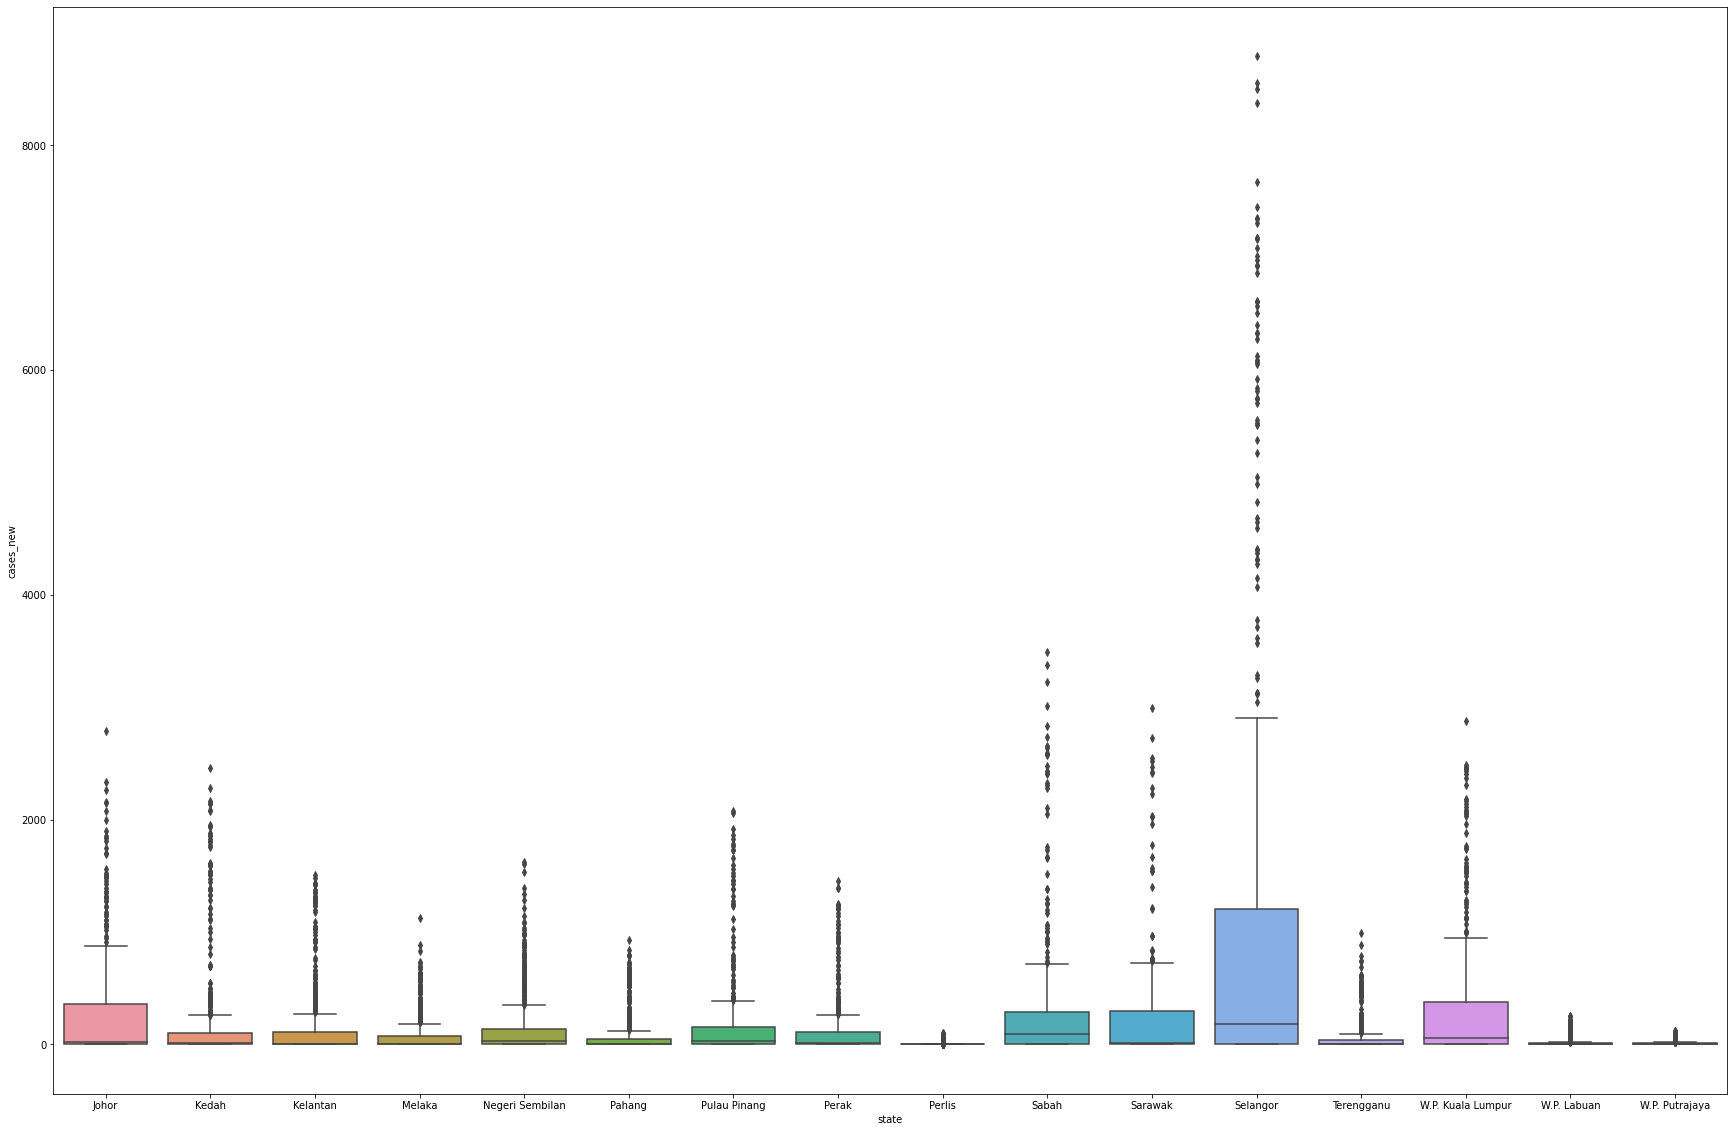

In [42]:
plt.figure(figsize=(30,20))
sns.boxplot(x = 'state',y ='cases_new', data = cases_state)

## Testing


In [43]:
tests_msia['day'] = tests_msia['date'].dt.day
tests_msia['month'] = tests_msia['date'].dt.month
tests_msia['year'] = tests_msia['date'].dt.year
#tests_msia.drop('date',inplace=True,axis=1)
tests_msia

date  rtk-ag    pcr  day  month  year
0   2020-01-24       0      2   24      1  2020
1   2020-01-25       0      5   25      1  2020
2   2020-01-26       0     14   26      1  2020
3   2020-01-27       0     24   27      1  2020
4   2020-01-28       0     53   28      1  2020
..         ...     ...    ...  ...    ...   ...
583 2021-08-29   54462  54230   29      8  2021
584 2021-08-30   93514  62893   30      8  2021
585 2021-08-31   55573  67125   31      8  2021
586 2021-09-01   96183  69043    1      9  2021
587 2021-09-02   90232  70035    2      9  2021

[588 rows x 6 columns]

In [44]:
tests_msia_2020 = tests_msia[tests_msia['year']==2020]
tests_msia_2021 = tests_msia[tests_msia['year']==2021]
tests_msia_2020

date  rtk-ag    pcr  day  month  year
0   2020-01-24       0      2   24      1  2020
1   2020-01-25       0      5   25      1  2020
2   2020-01-26       0     14   26      1  2020
3   2020-01-27       0     24   27      1  2020
4   2020-01-28       0     53   28      1  2020
..         ...     ...    ...  ...    ...   ...
338 2020-12-27   11846  21126   27     12  2020
339 2020-12-28   19703  13278   28     12  2020
340 2020-12-29   22034  25399   29     12  2020
341 2020-12-30   21802  25499   30     12  2020
342 2020-12-31   22518  20029   31     12  2020

[343 rows x 6 columns]

In [45]:
tests_msia_2020 = tests_msia_2020.groupby(['month'])['rtk-ag','pcr'].sum().reset_index()
#tests_msia_2020['month'] = tests_msia_2020['month'] .apply(lambda x: calendar.month_name[x])
tests_msia_2021 = tests_msia_2021.groupby(['month'])['rtk-ag','pcr'].sum().reset_index()

C:\Users\kelvi\AppData\Local\Temp/ipykernel_14752/4160240438.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

C:\Users\kelvi\AppData\Local\Temp/ipykernel_14752/4160240438.py:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [46]:
tests_msia_2020

month  rtk-ag     pcr
0       1       0     258
1       2       0    3621
2       3       0   81787
3       4       0  293470
4       5    6555  326359
5       6   37463  189436
6       7   54196  112086
7       8   56528  160779
8       9   61277  221219
9      10  131496  563052
10     11  180084  610539
11     12  533098  694138

In [47]:
tests_msia_2021 = tests_msia_2021.append([{'month' : 10},{'month' : 11},{'month' : 12}], ignore_index = True)
tests_msia_2021

month     rtk-ag        pcr
0       1   922322.0  1368359.0
1       2  1038582.0   913407.0
2       3   806875.0   895603.0
3       4   779933.0  1197188.0
4       5  1175575.0  1763084.0
5       6  1127473.0  1512382.0
6       7  1847833.0  1990387.0
7       8  2445323.0  2268001.0
8       9   186415.0   139078.0
9      10        NaN        NaN
10     11        NaN        NaN
11     12        NaN        NaN

In [48]:
tests_msia_2020.columns = ['month','Year 2020 rtk-ag','Year 2020 pcr']
tests_msia_2021.columns = ['month','Year 2021 rtk-ag','Year 2021 pcr']

In [49]:

tests_msia_2021['month'] = tests_msia_2021['month'] .apply(lambda x: calendar.month_name[x])
tests_msia_2021

month  Year 2021 rtk-ag  Year 2021 pcr
0     January          922322.0      1368359.0
1    February         1038582.0       913407.0
2       March          806875.0       895603.0
3       April          779933.0      1197188.0
4         May         1175575.0      1763084.0
5        June         1127473.0      1512382.0
6        July         1847833.0      1990387.0
7      August         2445323.0      2268001.0
8   September          186415.0       139078.0
9     October               NaN            NaN
10   November               NaN            NaN
11   December               NaN            NaN

In [50]:
# testmsiatest = tests_msia_2020.merge(tests_msia_2021,on='month')
# testmsiatest

In [51]:
tests_msia_2021_melt = tests_msia_2021.melt(id_vars='month',value_vars=['Year 2021 rtk-ag','Year 2021 pcr'])

In [52]:
tests_msia_2020['month'] = tests_msia_2020['month'] .apply(lambda x: calendar.month_name[x])


In [53]:
tests_msia_2021_melt

month          variable      value
0     January  Year 2021 rtk-ag   922322.0
1    February  Year 2021 rtk-ag  1038582.0
2       March  Year 2021 rtk-ag   806875.0
3       April  Year 2021 rtk-ag   779933.0
4         May  Year 2021 rtk-ag  1175575.0
5        June  Year 2021 rtk-ag  1127473.0
6        July  Year 2021 rtk-ag  1847833.0
7      August  Year 2021 rtk-ag  2445323.0
8   September  Year 2021 rtk-ag   186415.0
9     October  Year 2021 rtk-ag        NaN
10   November  Year 2021 rtk-ag        NaN
11   December  Year 2021 rtk-ag        NaN
12    January     Year 2021 pcr  1368359.0
13   February     Year 2021 pcr   913407.0
14      March     Year 2021 pcr   895603.0
15      April     Year 2021 pcr  1197188.0
16        May     Year 2021 pcr  1763084.0
17       June     Year 2021 pcr  1512382.0
18       July     Year 2021 pcr  1990387.0
19     August     Year 2021 pcr  2268001.0
20  September     Year 2021 pcr   139078.0
21    October     Year 2021 pcr        NaN
22   November     Year 2021 pcr        NaN
23   December     Year 2021 pcr        NaN

In [54]:
px.line(tests_msia_2021_melt,x='month',y = 'value',title='Testing Trend of 2021',color='variable')

In [55]:
tests_msia_2020_melt = tests_msia_2020.melt(id_vars='month',value_vars=['Year 2020 rtk-ag','Year 2020 pcr'])


In [56]:
px.line(tests_msia_2020_melt,x='month',y = 'value',title='Testing Trend of 2020',color='variable')

## Daily cases by state

In [57]:
state_list = ['Johor', 'Kedah', 'Kelantan', 'Melaka', 'Negeri Sembilan', 'Pahang',
 'Pulau Pinang', 'Perak', 'Perlis', 'Sabah', 'Sarawak', 'Selangor', 'Terengganu',
 'W.P. Kuala Lumpur', 'W.P. Labuan', 'W.P. Putrajaya']

statedf = []
for x in state_list:
  statedf.append(cases_state[cases_state['state'] == x].reset_index())

In [58]:
for x in statedf:
  x = x[['date','cases_new','cases_recovered']]
  display(x.head())

date  cases_new  cases_recovered
0 2020-01-25          4              0.0
1 2020-01-26          0              0.0
2 2020-01-27          0              0.0
3 2020-01-28          0              0.0
4 2020-01-29          2              0.0

date  cases_new  cases_recovered
0 2020-01-25          0              0.0
1 2020-01-26          0              0.0
2 2020-01-27          0              0.0
3 2020-01-28          0              0.0
4 2020-01-29          1              0.0

date  cases_new  cases_recovered
0 2020-01-25          0              0.0
1 2020-01-26          0              0.0
2 2020-01-27          0              0.0
3 2020-01-28          0              0.0
4 2020-01-29          0              0.0

date  cases_new  cases_recovered
0 2020-01-25          0              0.0
1 2020-01-26          0              0.0
2 2020-01-27          0              0.0
3 2020-01-28          0              0.0
4 2020-01-29          0              0.0

date  cases_new  cases_recovered
0 2020-01-25          0              0.0
1 2020-01-26          0              0.0
2 2020-01-27          0              0.0
3 2020-01-28          0              0.0
4 2020-01-29          0              0.0

date  cases_new  cases_recovered
0 2020-01-25          0              0.0
1 2020-01-26          0              0.0
2 2020-01-27          0              0.0
3 2020-01-28          0              0.0
4 2020-01-29          0              0.0

date  cases_new  cases_recovered
0 2020-01-25          0              0.0
1 2020-01-26          0              0.0
2 2020-01-27          0              0.0
3 2020-01-28          0              0.0
4 2020-01-29          0              0.0

date  cases_new  cases_recovered
0 2020-01-25          0              0.0
1 2020-01-26          0              0.0
2 2020-01-27          0              0.0
3 2020-01-28          0              0.0
4 2020-01-29          0              0.0

date  cases_new  cases_recovered
0 2020-01-25          0              0.0
1 2020-01-26          0              0.0
2 2020-01-27          0              0.0
3 2020-01-28          0              0.0
4 2020-01-29          0              0.0

date  cases_new  cases_recovered
0 2020-01-25          0              0.0
1 2020-01-26          0              0.0
2 2020-01-27          0              0.0
3 2020-01-28          0              0.0
4 2020-01-29          0              0.0

date  cases_new  cases_recovered
0 2020-01-25          0              0.0
1 2020-01-26          0              0.0
2 2020-01-27          0              0.0
3 2020-01-28          0              0.0
4 2020-01-29          0              0.0

date  cases_new  cases_recovered
0 2020-01-25          0              0.0
1 2020-01-26          0              0.0
2 2020-01-27          0              0.0
3 2020-01-28          0              0.0
4 2020-01-29          0              0.0

date  cases_new  cases_recovered
0 2020-01-25          0              0.0
1 2020-01-26          0              0.0
2 2020-01-27          0              0.0
3 2020-01-28          0              0.0
4 2020-01-29          0              0.0

date  cases_new  cases_recovered
0 2020-01-25          0              0.0
1 2020-01-26          0              0.0
2 2020-01-27          0              0.0
3 2020-01-28          0              0.0
4 2020-01-29          0              0.0

date  cases_new  cases_recovered
0 2020-01-25          0              0.0
1 2020-01-26          0              0.0
2 2020-01-27          0              0.0
3 2020-01-28          0              0.0
4 2020-01-29          0              0.0

date  cases_new  cases_recovered
0 2020-01-25          0              0.0
1 2020-01-26          0              0.0
2 2020-01-27          0              0.0
3 2020-01-28          0              0.0
4 2020-01-29          0              0.0

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

state_list = ['Johor', 'Kedah', 'Kelantan', 'Melaka', 'Negeri Sembilan', 'Pahang',
 'Pulau Pinang', 'Perak', 'Perlis', 'Sabah', 'Sarawak', 'Selangor', 'Terengganu',
 'W.P. Kuala Lumpur', 'W.P. Labuan', 'W.P. Putrajaya']

statedf = []
for x in state_list:
  statedf.append(cases_state[cases_state['state'] == x].reset_index())

for i in range(16):
  statedf[i].name = state_list[i]

fig = make_subplots(rows=2, cols=16)
i=1
for x in statedf:
  fig.add_trace(
    go.Scatter(x=x.index.get_level_values(0), y=x['cases_new'],name="{} new cases".format(x.name)),
    row=1,col=i
  )

  fig.add_trace(
      go.Scatter(x=x.index.get_level_values(0), y=x['cases_recovered'], name = "{} cases recovered".format(x.name)),
      row=2,col=i
  )
  i+=1
fig.update_layout(height=1200, width=10000, title_text="Side By Side plot for each state")
fig.show()

## Daily cases each date for 2020 and 2021

In [367]:
testing2020 = cases_msia[cases_msia['year'] == 2020]
testing2021 = cases_msia[cases_msia['year'] == 2021]


testing2020 = testing2020[['date','cases_new']]
testing2021 = testing2021[['date','cases_new']]
malaysia = pd.concat([testing2020,testing2021])
malaysia

date  cases_new
0   2020-01-25          4
1   2020-01-26          0
2   2020-01-27          0
3   2020-01-28          0
4   2020-01-29          3
5   2020-01-30          1
6   2020-01-31          0
7   2020-02-01          0
8   2020-02-02          0
9   2020-02-03          0
10  2020-02-04          2
11  2020-02-05          2
12  2020-02-06          2
13  2020-02-07          1
14  2020-02-08          1
15  2020-02-09          1
16  2020-02-10          1
17  2020-02-11          0
18  2020-02-12          0
19  2020-02-13          0
20  2020-02-14          1
21  2020-02-15          3
22  2020-02-16          0
23  2020-02-17          0
24  2020-02-18          0
25  2020-02-19          0
26  2020-02-20          0
27  2020-02-21          0
28  2020-02-22          0
29  2020-02-23          0
30  2020-02-24          0
31  2020-02-25          0
32  2020-02-26          0
33  2020-02-27          1
34  2020-02-28          2
35  2020-02-29          4
36  2020-03-01          0
37  2020-03-02          0
38  2020-03-03          7
39  2020-03-04         14
40  2020-03-05          5
41  2020-03-06         28
42  2020-03-07         10
43  2020-03-08          6
44  2020-03-09         18
45  2020-03-10         12
46  2020-03-11         20
47  2020-03-12          9
48  2020-03-13         39
49  2020-03-14         41
50  2020-03-15        190
51  2020-03-16        125
52  2020-03-17        120
53  2020-03-18        117
54  2020-03-19        110
55  2020-03-20        130
56  2020-03-21        153
57  2020-03-22        123
58  2020-03-23        212
59  2020-03-24        106
60  2020-03-25        172
61  2020-03-26        235
62  2020-03-27        116
63  2020-03-28        173
64  2020-03-29        150
65  2020-03-30        156
66  2020-03-31        140
67  2020-04-01        142
68  2020-04-02        208
69  2020-04-03        217
70  2020-04-04        150
71  2020-04-05        179
72  2020-04-06        131
73  2020-04-07        170
74  2020-04-08        156
75  2020-04-09        109
76  2020-04-10        118
77  2020-04-11        184
78  2020-04-12        153
79  2020-04-13        134
80  2020-04-14        170
81  2020-04-15         85
82  2020-04-16        110
83  2020-04-17         69
84  2020-04-18         54
85  2020-04-19         84
86  2020-04-20         36
87  2020-04-21         57
88  2020-04-22         50
89  2020-04-23         71
90  2020-04-24         88
91  2020-04-25         51
92  2020-04-26         38
93  2020-04-27         40
94  2020-04-28         31
95  2020-04-29         94
96  2020-04-30         57
97  2020-05-01         69
98  2020-05-02        105
99  2020-05-03        122
100 2020-05-04         55
101 2020-05-05         30
102 2020-05-06         45
103 2020-05-07         39
104 2020-05-08         68
105 2020-05-09         54
106 2020-05-10         67
107 2020-05-11         70
108 2020-05-12         16
109 2020-05-13         35
110 2020-05-14         40
111 2020-05-15         36
112 2020-05-16         19
113 2020-05-17         22
114 2020-05-18         47
115 2020-05-19         36
116 2020-05-20         32
117 2020-05-21         50
118 2020-05-22         78
119 2020-05-23         48
120 2020-05-24         60
121 2020-05-25        172
122 2020-05-26        187
123 2020-05-27         15
124 2020-05-28         10
125 2020-05-29        103
126 2020-05-30         30
127 2020-05-31         57
128 2020-06-01         38
129 2020-06-02         20
130 2020-06-03         93
131 2020-06-04        277
132 2020-06-05         19
133 2020-06-06         37
134 2020-06-07         19
135 2020-06-08          7
136 2020-06-09          7
137 2020-06-10          2
138 2020-06-11         31
139 2020-06-12         33
140 2020-06-13         43
141 2020-06-14          8
142 2020-06-15         41
143 2020-06-16         11
144 2020-06-17         10
145 2020-06-18         14
146 2020-06-19          6
147 2020-06-20         21
148 2020-06-21         16
149 2020-06-22         15
150 2020-06-23          3
151 2020-06-24          6
152 2020-06-25          4
153 20

In [371]:
px.line(testing2021,x='date',y ='cases_new',title='Covid-19 Trend of 2021')

In [372]:
px.line(testing2020,x='date',y ='cases_new',title='Covid-19 Trend of 2020')

In [373]:
px.line(malaysia,x='date',y ='cases_new',title='Covid-19 Trend of the Whole Pandemic')

# Correlation Check

In [60]:
state_list = ['Johor', 'Kedah', 'Kelantan', 'Melaka', 'Negeri Sembilan', 'Pahang',
 'Pulau Pinang', 'Perak', 'Perlis', 'Sabah', 'Sarawak', 'Selangor', 'Terengganu',
 'W.P. Kuala Lumpur', 'W.P. Labuan', 'W.P. Putrajaya']

statedf = []

## For cases_state

In [61]:
statedf = []
johor = cases_state[cases_state['state'] == 'Johor'].reset_index()
pahang = cases_state[cases_state['state'] == 'Pahang'].reset_index()
for x in state_list:
  statedf.append(cases_state[cases_state['state'] == x].reset_index())

In [62]:
for i in statedf:
    print("State :" + i['state'].iloc[0])
    print(johor.corrwith(i,axis=0))
    print('\n')

State :Johor
index              1.0
cases_new          1.0
cases_import       1.0
cases_recovered    1.0
day                1.0
month              1.0
year               1.0
dtype: float64


State :Kedah
index              1.000000
cases_new          0.893259
cases_import       0.039288
cases_recovered    0.685298
day                1.000000
month              1.000000
year               1.000000
dtype: float64


State :Kelantan
index              1.000000
cases_new          0.871462
cases_import       0.048918
cases_recovered    0.643843
day                1.000000
month              1.000000
year               1.000000
dtype: float64


State :Melaka
index              1.000000
cases_new          0.798864
cases_import       0.002502
cases_recovered    0.630391
day                1.000000
month              1.000000
year               1.000000
dtype: float64


State :Negeri Sembilan
index              1.000000
cases_new          0.584361
cases_import      -0.006532
cases_recovered    0

## Tests_state

In [63]:
statedf = []
johor = tests_state[tests_state['state'] == 'Johor'].reset_index()
pahang = tests_state[tests_state['state'] == 'Pahang'].reset_index()
for x in state_list:
  statedf.append(tests_state[tests_state['state'] == x].reset_index())

In [64]:
for i in statedf:
    print("State :" + i['state'].iloc[0])
    print(pahang.corrwith(i,axis=0))
    print('\n')

State :Johor
index     1.000000
rtk-ag    0.567681
pcr       0.220117
dtype: float64


State :Kedah
index     1.000000
rtk-ag    0.511102
pcr       0.236495
dtype: float64


State :Kelantan
index     1.000000
rtk-ag    0.045833
pcr       0.006170
dtype: float64


State :Melaka
index     1.000000
rtk-ag    0.355325
pcr       0.396268
dtype: float64


State :Negeri Sembilan
index     1.000000
rtk-ag    0.730781
pcr       0.517310
dtype: float64


State :Pahang
index     1.0
rtk-ag    1.0
pcr       1.0
dtype: float64


State :Pulau Pinang
index     1.000000
rtk-ag    0.665983
pcr       0.201938
dtype: float64


State :Perak
index     1.000000
rtk-ag    0.702168
pcr       0.437661
dtype: float64


State :Perlis
index     1.000000
rtk-ag    0.241252
pcr      -0.277211
dtype: float64


State :Sabah
index     1.000000
rtk-ag    0.820659
pcr       0.205597
dtype: float64


State :Sarawak
index     1.000000
rtk-ag    0.222796
pcr      -0.118586
dtype: float64


State :Selangor
index     1.00000

###Daily Cases By States


In [65]:
def transformStateDF(state):
  df = cases_state['state'] == state
  df_cases = cases_state[df]
  df_cases = df_cases.reset_index()
  df_cases.drop(['cases_import','cases_recovered','day','month','year','index'], axis=1,inplace=True)

  df_cases['1day'] = 0
  df_cases['2day'] = 0
  df_cases['3day'] = 0
  df_cases['3day'] = 0
  df_cases['4day'] = 0
  df_cases['5day'] = 0
  df_cases['6day'] = 0
  df_cases['1week'] = 0
  df_cases['2week'] = 0
  df_cases['3week'] = 0
  df_cases['4week'] = 0
  df_cases['1mth'] = 0
  df_cases['2mth'] = 0
  df_cases['3mth'] = 0
  df_cases['4mth'] = 0
  df_cases['5mth'] = 0
  df_cases['6mth'] = 0
  df_cases['7mth'] = 0
  df_cases['8mth'] = 0
  df_cases['9mth'] = 0
  df_cases['10mth'] = 0
  df_cases['11mth'] = 0
  df_cases['1year'] = 0
  df_cases['1year1Mth'] = 0
  df_cases['1year2Mth'] = 0
  df_cases['1year3Mth'] = 0
  df_cases['1year4Mth'] = 0
  df_cases['1year5Mth'] = 0
  df_cases['1year6Mth'] = 0
  df_cases['1year7Mth'] = 0

  for i in range(3,9):
    for j in range(len(df_cases)):
      date = df_cases['date'][j] - relativedelta(days=+(i-2))
      adayb4 = df_cases[df_cases['date'] == date]
      if adayb4.empty:
        df_cases.iloc[[j],[i]] = 0
      else:
        df_cases.iloc[[j],[i]] = adayb4.cases_new.values[0]

  for i in range(9,13):
    for j in range(len(df_cases)):
      date = df_cases['date'][j] - relativedelta(weeks=+(i-8))
      adayb4 = df_cases[df_cases['date'] == date]
      if adayb4.empty:
        df_cases.iloc[[j],[i]] = 0
      else:
        df_cases.iloc[[j],[i]] = adayb4.cases_new.values[0]
  
  for i in range(13,24):
    for j in range(len(df_cases)):
      date = df_cases['date'][j] - relativedelta(months=+(i-12))
      adayb4 = df_cases[df_cases['date'] == date]
      if adayb4.empty:
        df_cases.iloc[[j],[i]] = 0
      else:
        df_cases.iloc[[j],[i]] = adayb4.cases_new.values[0]

  for i in range(24,32):
    for j in range(len(df_cases)):
      if i == 24:
        date = df_cases['date'][j] - relativedelta(years=+(1))
      else:
        date = df_cases['date'][j] - relativedelta(months=+(i-24)) - relativedelta(years=+(1))
      adayb4 = df_cases[df_cases['date'] == date]
      if adayb4.empty:
        df_cases.iloc[[j],[i]] = 0
      else:
        df_cases.iloc[[j],[i]] = adayb4.cases_new.values[0]


  return df_cases


In [66]:
from datetime import timedelta
from dateutil.relativedelta import *

johor = transformStateDF('Johor')
kedah = transformStateDF('Kedah')
kelantan = transformStateDF('Kelantan')
melaka = transformStateDF('Melaka')
n9 = transformStateDF('Negeri Sembilan')
pahang = transformStateDF('Pahang')
perak = transformStateDF('Perak')
perlis = transformStateDF('Perlis')
pp = transformStateDF('Pulau Pinang')
sabah = transformStateDF('Sabah')
sarawak = transformStateDF('Sarawak')
selangor = transformStateDF('Selangor')
terengganu = transformStateDF('Terengganu')
KL = transformStateDF('W.P. Kuala Lumpur')
labuan = transformStateDF('W.P. Labuan')
putrajaya = transformStateDF('W.P. Putrajaya')

In [67]:
boruta_rank

FeaturePahang  RankingPahang  \
0                (1mth, Sarawak)              1   
1             (1year2Mth, Johor)              3   
2             (1year2Mth, Perak)              5   
3           (1year2Mth, Sarawak)              8   
4               (2day, Selangor)             27   
5                 (4mth, Perlis)              7   
6         (4mth, W.P. Putrajaya)             12   
7               (4week, Sarawak)             21   
8           (4week, W.P. Labuan)              1   
9            (5day, W.P. Labuan)             22   
10              (5mth, Selangor)             10   
11     (5mth, W.P. Kuala Lumpur)              1   
12        (5mth, W.P. Putrajaya)             27   
13     (6mth, W.P. Kuala Lumpur)             29   
14        (6mth, W.P. Putrajaya)              2   
15                 (8mth, Kedah)              2   
16           (8mth, W.P. Labuan)              2   
17                 (9mth, Kedah)              2   
18           (1day, W.P. Labuan)             29   
19           (1year2Mth, Pahang)             26   
20         (1year2Mth, Selangor)             20   
21  (1year3Mth, Negeri Sembilan)             18   
22           (1year3Mth, Pahang)             11   
23                (2mth, Pahang)              1   
24     (3day, W.P. Kuala Lumpur)             15   
25     (4day, W.P. Kuala Lumpur)              1   
26                 (4mth, Perak)              1   
27              (4mth, Selangor)             12   
28      (4week, Negeri Sembilan)             19   
29          (5mth, Pulau Pinang)              1   
30            (5mth, Terengganu)              6   
31                (6mth, Pahang)              8   
32                (6mth, Perlis)              4   
33          (6mth, Pulau Pinang)             24   
34              (6mth, Selangor)             14   
35                 (7mth, Kedah)             16   
36       (7mth, Negeri Sembilan)             16   
37           (7mth, W.P. Labuan)             22   
38       (8mth, Negeri Sembilan)              1   
39     (8mth, W.P. Kuala Lumpur)             24   

                      FeatureKedah  RankingKedah  \
0                   (10mth, Johor)          19.0   
1                   (10mth, Perak)          11.0   
2             (1week, W.P. Labuan)          24.0   
3               (1year2Mth, Johor)           4.0   
4               (1year2Mth, Perak)           3.0   
5            (1year2Mth, Selangor)           1.0   
6      (1year2Mth, W.P. Putrajaya)          13.0   
7              (1year3Mth, Melaka)          21.0   
8              (1year3Mth, Pahang)           1.0   
9             (1year3Mth, Sarawak)          20.0   
10         (1year3Mth, Terengganu)          18.0   
11            (1year4Mth, Sarawak)          17.0   
12  (1year4Mth, W.P. Kuala Lumpur)          27.0   
13             (2day, W.P. Labuan)          13.0   
14                   (2mth, Sabah)          22.0   
15       (3day, W.P. Kuala Lumpur)           9.0   
16                   (3mth, Sabah)          22.0   
17                   (4mth, Kedah)           6.0   
18                  (4mth, Perlis)          15.0   
19       (5day, W.P. Kuala Lumpur)          29.0   
20             (5day, W.P. Labuan)           8.0   
21                  (5mth, Pahang)          28.0   
22                   (5mth, Perak)           5.0   
23       (5mth, W.P. Kuala Lumpur)          10.0   
24         (7mth, Negeri Sembilan)           1.0   
25         (8mth, Negeri Sembilan)          30.0   
26                   (8mth, Perak)           7.0   
27                   (8mth, Sabah)          25.0   
28                (8mth, Selangor)          15.0   
29             (8mth, W.P. Labuan)          25.0   
30                   (9mth, Kedah)           1.0   
31         (9mth, Negeri Sembilan)           2.0   
32    (cases_new, Negeri Sembilan)          11.0   
33                             NaN           NaN   
34                             NaN           NaN   
35                             NaN           NaN   
36 

In [68]:
#msia = [johor,kedah,kelantan,melaka,n9,pahang,perak,perlis,pp,sabah,sarawak,selangor,terengganu,KL,labuan,putrajaya]
#df_msia = pd.concat(msia)
df_msia

date           state  cases_new  1day  2day  3day  4day  5day  \
0     2020-01-25           Johor          4     0     0     0     0     0   
1     2020-01-26           Johor          0     4     0     0     0     0   
2     2020-01-27           Johor          0     0     4     0     0     0   
3     2020-01-28           Johor          0     0     0     4     0     0   
4     2020-01-29           Johor          2     0     0     0     4     0   
...          ...             ...        ...   ...   ...   ...   ...   ...   
9419  2021-08-31  W.P. Putrajaya         25    41    48    48    39    20   
9420  2021-09-01  W.P. Putrajaya         34    25    41    48    48    39   
9421  2021-09-02  W.P. Putrajaya         37    34    25    41    48    48   
9422  2021-09-03  W.P. Putrajaya         41    37    34    25    41    48   
9423  2021-09-04  W.P. Putrajaya         18    41    37    34    25    41   

      6day  1week  ...  10mth  11mth  1year  1year1Mth  1year2Mth  1year3Mth  \
0        0      0  ...      0      0      0          0          0          0   
1        0      0  ...      0      0      0          0          0          0   
2        0      0  ...      0      0      0          0          0          0   
3        0      0  ...      0      0      0          0          0          0   
4        0      0  ...      0      0      0          0          0          0   
...    ...    ...  ...    ...    ...    ...        ...        ...        ...   
9419    21     27  ...      4      0      0          0          0          0   
9420    20     21  ...      1      5      0          0          0          0   
9421    39     20  ...      6      0      0          0          0          0   
9422    48     39  ...      3      2      0          0          0          0   
9423    48     48  ...      4      0      0          0          0          0   

      1year4Mth  1year5Mth  1year6Mth  1year7Mth  
0             0          0          0          0  
1             0          0          0          0  
2             0          0          0          0  
3             0          0          0          0  
4             0          0          0          0  
...         ...        ...        ...        ...  
9419          1          2          0          0  
9420          4          0          0          0  
9421          0          7          0          0  
9422          1          1          1          0  
9423          0          1          1          0  

[9424 rows x 32 columns]

In [69]:
pt_msia = df_msia.pivot_table(values=['date', 'state', 'cases_new', '1day', '2day', '3day', '4day', '5day',
       '6day', '1week', '2week', '3week', '4week', '1mth', '2mth', '3mth',
       '4mth', '5mth', '6mth', '7mth', '8mth', '9mth', '10mth', '11mth',
       '1year', '1year1Mth', '1year2Mth', '1year3Mth', '1year4Mth',
       '1year5Mth', '1year6Mth', '1year7Mth'],index='date',columns=['state'])
pt_msia

10mth                                                            \
state      Johor Kedah Kelantan Melaka Negeri Sembilan Pahang Perak Perlis   
date                                                                         
2020-01-25     0     0        0      0               0      0     0      0   
2020-01-26     0     0        0      0               0      0     0      0   
2020-01-27     0     0        0      0               0      0     0      0   
2020-01-28     0     0        0      0               0      0     0      0   
2020-01-29     0     0        0      0               0      0     0      0   
...          ...   ...      ...    ...             ...    ...   ...    ...   
2021-08-31     0     2        1      0              25      1     6      0   
2021-09-01     1     1        0      1               8      0     5      0   
2021-09-02     9     3        2      0              16      1     3      0   
2021-09-03     1    12        0      1              71      0     3      0   
2021-09-04     2    25        2      0              44      0     6      0   

                               ... cases_new                            \
state      Pulau Pinang Sabah  ...     Perak Perlis Pulau Pinang Sabah   
date                           ...                                       
2020-01-25            0     0  ...         0      0            0     0   
2020-01-26            0     0  ...         0      0            0     0   
2020-01-27            0     0  ...         0      0            0     0   
2020-01-28            0     0  ...         0      0            0     0   
2020-01-29            0     0  ...         0      0            0     0   
...                 ...   ...  ...       ...    ...          ...   ...   
2021-08-31            2   529  ...      1204     64         1732  2594   
2021-09-01           23   644  ...       899     33         1762  2430   
2021-09-02           21   503  ...       990     90         1600  2329   
2021-09-03           35   678  ...      1389     80         1726  2404   
2021-09-04           23   646  ...      1450     99         1558  2279   

                                                                      \
state      Sarawak Selangor Terengganu W.P. Kuala Lumpur W.P. Labuan   
date                                                                   
2020-01-25       0        0          0                 0           0   
2020-01-26       0        0          0                 0           0   
2020-01-27       0        0          0                 0           0   
2020-01-28       0        0          0                 0           0   
2020-01-29       0        0          0                 0           0   
...            ...      ...        ...               ...         ...   
2021-08-31    2285     4371        608              1003           1   
2021-09-01    2414     3711        506               573           3   
2021-09-02    2992     4073        987               731           5   
2021-09-03    2464     3613        532               740           4   
2021-09-04    2723     3775        605               711           9   

                           
state      W.P. Putrajaya  
date                       
2020-01-25              0  
2020-01-26              0  
2020-01-27              0  
2020-01-28              0  
2020-01-29              0  
...                   ...  
2021-08-31             25  
2021-09-01             34  
2021-09-02             37  
2021-09-03             41  
2021-09-04             18  

[589 rows x 480 columns]

In [70]:
pt_msia.columns.unique()

MultiIndex([(    '10mth',             'Johor'),
            (    '10mth',             'Kedah'),
            (    '10mth',          'Kelantan'),
            (    '10mth',            'Melaka'),
            (    '10mth',   'Negeri Sembilan'),
            (    '10mth',            'Pahang'),
            (    '10mth',             'Perak'),
            (    '10mth',            'Perlis'),
            (    '10mth',      'Pulau Pinang'),
            (    '10mth',             'Sabah'),
            ...
            ('cases_new',             'Perak'),
            ('cases_new',            'Perlis'),
            ('cases_new',      'Pulau Pinang'),
            ('cases_new',             'Sabah'),
            ('cases_new',           'Sarawak'),
            ('cases_new',          'Selangor'),
            ('cases_new',        'Terengganu'),
            ('cases_new', 'W.P. Kuala Lumpur'),
            ('cases_new',       'W.P. Labuan'),
            ('cases_new',    'W.P. Putrajaya')],
           names=[None,

# Feature Extraction


In [71]:
!pip install Boruta

In [72]:
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy
from sklearn.feature_selection import RFECV

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from tqdm import tqdm_notebook, tqdm
#tqdm.pandas(tqdm_notebook)

import warnings
warnings.filterwarnings('ignore')

In [73]:
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

### Wrapper Feature Selection Method


#### Boruta

##### Pahang

In [74]:
XPahang = pt_msia.drop(('cases_new', 'Pahang'),1)
yPahang = pt_msia[('cases_new', 'Pahang')]
colnamesPahang = XPahang.columns

In [75]:
rf = RandomForestClassifier(n_jobs=1,class_weight="balanced",max_depth=5)
feat_selector_Pahang = BorutaPy(rf,n_estimators="auto",random_state=1)

In [76]:
feat_selector_Pahang.fit(XPahang.values,yPahang.values.ravel())

BorutaPy(estimator=RandomForestClassifier(class_weight='balanced', max_depth=5,
                                          n_estimators=80, n_jobs=1,
                                          random_state=RandomState(MT19937) at 0x275D4FB6940),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x275D4FB6940)

In [77]:
boruta_score_Pahang = ranking(list(map(float,feat_selector_Pahang.ranking_)),colnamesPahang,order=-1)
boruta_score_Pahang = pd.DataFrame(list(boruta_score_Pahang.items()),columns=['Features','Score'])
boruta_score_Pahang = boruta_score_Pahang.sort_values("Score",ascending=False)

In [78]:
print('---------Top 20----------')
display(boruta_score_Pahang.head(20))

print('---------Bottom 20----------')
boruta_score_Pahang.tail(20)

---------Top 20----------


Features  Score
109  (1year1Mth, W.P. Kuala Lumpur)   1.00
449                   (9mth, Kedah)   1.00
404         (6mth, Negeri Sembilan)   1.00
415          (6mth, W.P. Putrajaya)   1.00
58                  (1mth, Sarawak)   1.00
350            (4week, W.P. Labuan)   1.00
244        (2week, Negeri Sembilan)   1.00
327                  (4mth, Perlis)   1.00
114           (1year2Mth, Kelantan)   0.99
118              (1year2Mth, Perak)   0.99
335          (4mth, W.P. Putrajaya)   0.99
374                   (5mth, Perak)   0.99
381       (5mth, W.P. Kuala Lumpur)   0.98
452         (9mth, Negeri Sembilan)   0.98
112              (1year2Mth, Johor)   0.98
366             (5day, W.P. Labuan)   0.98
446             (8mth, W.P. Labuan)   0.98
413       (6mth, W.P. Kuala Lumpur)   0.97
346                (4week, Sarawak)   0.97
77       (1week, W.P. Kuala Lumpur)   0.97

---------Bottom 20----------


Features  Score
183           (1year6Mth, Perlis)    0.0
178         (1year6Mth, Kelantan)    0.0
185            (1year6Mth, Sabah)    0.0
179           (1year6Mth, Melaka)    0.0
199           (1year7Mth, Perlis)    0.0
181           (1year6Mth, Pahang)    0.0
201            (1year7Mth, Sabah)    0.0
188       (1year6Mth, Terengganu)    0.0
186          (1year6Mth, Sarawak)    0.0
202          (1year7Mth, Sarawak)    0.0
204       (1year7Mth, Terengganu)    0.0
190      (1year6Mth, W.P. Labuan)    0.0
197           (1year7Mth, Pahang)    0.0
206      (1year7Mth, W.P. Labuan)    0.0
207   (1year7Mth, W.P. Putrajaya)    0.0
196  (1year7Mth, Negeri Sembilan)    0.0
195           (1year7Mth, Melaka)    0.0
194         (1year7Mth, Kelantan)    0.0
198            (1year7Mth, Perak)    0.0
182            (1year6Mth, Perak)    0.0

In [79]:
 print("Ranking: ",feat_selector_Pahang.ranking_)
 print("No. of significant features: ", feat_selector_Pahang.n_features_) 

Ranking:  [354 367  43 141 438 380 303 364 102 177 206 214 194 182 368 262 443 345
 390 433 184 444 449 333 452 205 406 442 446 425 436 445 413 341 406  48
 141 290 163 370 386 295 192 166 252  53  76  62 382 145 160 355  63 338
 384 342 327 417   1 323 350 401  76 408 340 203 370 155  65  52 303 317
 332 316 431  23 143  13 108 162 439 191 433 300  40 427 437 378 451 433
 353 421 411  50 448 441 286 339 225 174  69  56 440 447 149  92 252 310
  86   2 430 270   8 126   4 242  70  57   5 268 130  99  16  46  67  19
 317 392  91 256 393 212  61  30 145 385 140 414  73  58  83 170 279 349
 106  96 247  95 249 100 194 156 147  94  42 266 113 116 139 126 260 179
 225 307 211 365 320 295 189 136 306 302 159 273 334 335 245 416 463 463
 378 463 463 463 463 463 463 417 463 420 463 429 323 428 463 463 463 463
 463 463 463 463 463 433 463 449 463 463 169 348 389 123  32 273 408 246
 292 282 254  17 360 164  38 276 419  86  36 314 278  81 131 391 153 401
 190 399  71 254 132 103 380 299 359 264 

In [80]:
selected_rf_features_Pahang = pd.DataFrame({'Feature':list(XPahang.columns),
                                       'Ranking':feat_selector_Pahang.ranking_})
selected_rf_features_Pahang.sort_values(by='Ranking') 
rank1Pahang = selected_rf_features_Pahang['Ranking'] <= 30
selected_rf_features_Pahang[rank1Pahang]

Feature  Ranking
58                  (1mth, Sarawak)        1
75                (1week, Selangor)       23
77       (1week, W.P. Kuala Lumpur)       13
109  (1year1Mth, W.P. Kuala Lumpur)        2
112              (1year2Mth, Johor)        8
114           (1year2Mth, Kelantan)        4
118              (1year2Mth, Perak)        5
122            (1year2Mth, Sarawak)       16
125  (1year2Mth, W.P. Kuala Lumpur)       19
133             (1year3Mth, Pahang)       30
219                (2day, Selangor)       17
244        (2week, Negeri Sembilan)        1
254            (2week, W.P. Labuan)       22
267                (3day, Selangor)       26
327                  (4mth, Perlis)        3
335          (4mth, W.P. Putrajaya)        7
340        (4week, Negeri Sembilan)       28
346                (4week, Sarawak)       15
350            (4week, W.P. Labuan)        1
366             (5day, W.P. Labuan)       10
374                   (5mth, Perak)        6
379                (5mth, Selangor)       23
381       (5mth, W.P. Kuala Lumpur)       11
383          (5mth, W.P. Putrajaya)       21
404         (6mth, Negeri Sembilan)        1
412              (6mth, Terengganu)       26
413       (6mth, W.P. Kuala Lumpur)       14
415          (6mth, W.P. Putrajaya)        1
433                   (8mth, Kedah)       25
437                  (8mth, Pahang)       28
443                (8mth, Selangor)       20
446             (8mth, W.P. Labuan)        9
449                   (9mth, Kedah)        1
452         (9mth, Negeri Sembilan)       12
468    (cases_new, Negeri Sembilan)       18

##### Kedah

In [81]:
XKedah = pt_msia.drop(('cases_new', 'Kedah'),1)
yKedah = pt_msia[('cases_new', 'Kedah')]
colnamesKedah = XKedah.columns
feat_selector_kedah = BorutaPy(rf,n_estimators="auto",random_state=1)

In [82]:
feat_selector_kedah.fit(XKedah.values,yKedah.values.ravel())

BorutaPy(estimator=RandomForestClassifier(class_weight='balanced', max_depth=5,
                                          n_estimators=56, n_jobs=1,
                                          random_state=RandomState(MT19937) at 0x275D5040640),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x275D5040640)

In [83]:
boruta_score_Kedah = ranking(list(map(float,feat_selector_kedah.ranking_)),colnamesKedah,order=-1)
boruta_score_Kedah = pd.DataFrame(list(boruta_score_Kedah.items()),columns=['Features','Score'])
boruta_score_Kedah = boruta_score_Kedah.sort_values("Score",ascending=False)

In [84]:
print('---------Top 20----------')
display(boruta_score_Kedah.head(20))

print('---------Bottom 20----------')
boruta_score_Kedah.tail(20)

---------Top 20----------


Features  Score
420       (7mth, Negeri Sembilan)   1.00
112            (1year2Mth, Johor)   1.00
123         (1year2Mth, Selangor)   1.00
449                 (9mth, Kedah)   1.00
452       (9mth, Negeri Sembilan)   1.00
133           (1year3Mth, Pahang)   1.00
438                 (8mth, Perak)   0.99
321                 (4mth, Kedah)   0.99
118            (1year2Mth, Perak)   0.99
374                 (5mth, Perak)   0.99
127   (1year2Mth, W.P. Putrajaya)   0.98
366           (5day, W.P. Labuan)   0.98
269     (3day, W.P. Kuala Lumpur)   0.98
467  (cases_new, Negeri Sembilan)   0.98
381     (5mth, W.P. Kuala Lumpur)   0.98
222           (2day, W.P. Labuan)   0.98
327                (4mth, Perlis)   0.97
0                  (10mth, Johor)   0.97
154          (1year4Mth, Sarawak)   0.97
443              (8mth, Selangor)   0.97

---------Bottom 20----------


Features  Score
190      (1year6Mth, W.P. Labuan)    0.0
204       (1year7Mth, Terengganu)    0.0
202          (1year7Mth, Sarawak)    0.0
201            (1year7Mth, Sabah)    0.0
179           (1year6Mth, Melaka)    0.0
199           (1year7Mth, Perlis)    0.0
198            (1year7Mth, Perak)    0.0
200     (1year7Mth, Pulau Pinang)    0.0
182            (1year6Mth, Perak)    0.0
206      (1year7Mth, W.P. Labuan)    0.0
207   (1year7Mth, W.P. Putrajaya)    0.0
181           (1year6Mth, Pahang)    0.0
195           (1year7Mth, Melaka)    0.0
183           (1year6Mth, Perlis)    0.0
184     (1year6Mth, Pulau Pinang)    0.0
185            (1year6Mth, Sabah)    0.0
186          (1year6Mth, Sarawak)    0.0
188       (1year6Mth, Terengganu)    0.0
194         (1year7Mth, Kelantan)    0.0
196  (1year7Mth, Negeri Sembilan)    0.0

In [85]:
selected_rf_features_Kedah = pd.DataFrame({'Feature':list(XKedah.columns),
                                       'Ranking':feat_selector_kedah.ranking_})
selected_rf_features_Kedah.sort_values(by='Ranking') 
rank1Kedah = selected_rf_features_Kedah['Ranking'] <= 30
selected_rf_features_Kedah[rank1Kedah]

Feature  Ranking
0                    (10mth, Johor)       14
6                    (10mth, Perak)       18
78             (1week, W.P. Labuan)       25
112              (1year2Mth, Johor)        3
118              (1year2Mth, Perak)        4
123           (1year2Mth, Selangor)        1
127     (1year2Mth, W.P. Putrajaya)       12
131             (1year3Mth, Melaka)       22
133             (1year3Mth, Pahang)        1
138            (1year3Mth, Sarawak)       20
140         (1year3Mth, Terengganu)       19
154            (1year4Mth, Sarawak)       16
157  (1year4Mth, W.P. Kuala Lumpur)       27
222             (2day, W.P. Labuan)       12
233                   (2mth, Sabah)       23
269       (3day, W.P. Kuala Lumpur)        9
281                   (3mth, Sabah)       21
321                   (4mth, Kedah)        6
327                  (4mth, Perlis)       14
365       (5day, W.P. Kuala Lumpur)       29
366             (5day, W.P. Labuan)        8
373                  (5mth, Pahang)       27
374                   (5mth, Perak)        5
381       (5mth, W.P. Kuala Lumpur)       11
400                   (6mth, Johor)       30
420         (7mth, Negeri Sembilan)        1
438                   (8mth, Perak)        7
441                   (8mth, Sabah)       24
443                (8mth, Selangor)       16
446             (8mth, W.P. Labuan)       25
449                   (9mth, Kedah)        1
452         (9mth, Negeri Sembilan)        2
467    (cases_new, Negeri Sembilan)       10

##### Johor

In [86]:
XJohor = pt_msia.drop(('cases_new', 'Johor'),1)
yJohor = pt_msia[('cases_new', 'Johor')]
colnamesJohor = XJohor.columns
feat_selector_johor = BorutaPy(rf,n_estimators="auto",random_state=1)

In [87]:
feat_selector_johor.fit(XJohor.values,yJohor.values.ravel())

BorutaPy(estimator=RandomForestClassifier(class_weight='balanced', max_depth=5,
                                          n_estimators=48, n_jobs=1,
                                          random_state=RandomState(MT19937) at 0x275D5040840),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x275D5040840)

In [88]:
boruta_score_Johor = ranking(list(map(float,feat_selector_johor.ranking_)),colnamesJohor,order=-1)
boruta_score_Johor = pd.DataFrame(list(boruta_score_Johor.items()),columns=['Features','Score'])
boruta_score_Johor = boruta_score_Johor.sort_values("Score",ascending=False)

In [89]:
print('---------Top 20----------')
display(boruta_score_Johor.head(20))

print('---------Bottom 20----------')
boruta_score_Johor.tail(20)

---------Top 20----------


Features  Score
281               (3mth, Sabah)   1.00
449               (9mth, Kedah)   1.00
13   (10mth, W.P. Kuala Lumpur)   1.00
231              (2mth, Perlis)   0.99
374               (5mth, Perak)   0.99
82            (1year, Kelantan)   0.99
346            (4week, Sarawak)   0.99
414         (6mth, W.P. Labuan)   0.99
409               (6mth, Sabah)   0.98
219            (2day, Selangor)   0.98
2             (10mth, Kelantan)   0.98
328        (4mth, Pulau Pinang)   0.98
267            (3day, Selangor)   0.97
412          (6mth, Terengganu)   0.97
398         (6day, W.P. Labuan)   0.97
442             (8mth, Sarawak)   0.97
107       (1year1Mth, Selangor)   0.97
369               (5mth, Kedah)   0.96
0                (10mth, Johor)   0.96
452     (9mth, Negeri Sembilan)   0.96

---------Bottom 20----------


Features  Score
194         (1year7Mth, Kelantan)    0.0
190      (1year6Mth, W.P. Labuan)    0.0
188       (1year6Mth, Terengganu)    0.0
186          (1year6Mth, Sarawak)    0.0
197           (1year7Mth, Pahang)    0.0
198            (1year7Mth, Perak)    0.0
185            (1year6Mth, Sabah)    0.0
182            (1year6Mth, Perak)    0.0
183           (1year6Mth, Perlis)    0.0
206      (1year7Mth, W.P. Labuan)    0.0
181           (1year6Mth, Pahang)    0.0
179           (1year6Mth, Melaka)    0.0
178         (1year6Mth, Kelantan)    0.0
195           (1year7Mth, Melaka)    0.0
199           (1year7Mth, Perlis)    0.0
200     (1year7Mth, Pulau Pinang)    0.0
201            (1year7Mth, Sabah)    0.0
202          (1year7Mth, Sarawak)    0.0
204       (1year7Mth, Terengganu)    0.0
196  (1year7Mth, Negeri Sembilan)    0.0

In [90]:
selected_rf_features_Johor = pd.DataFrame({'Feature':list(XJohor.columns),
                                       'Ranking':feat_selector_johor.ranking_})
selected_rf_features_Johor.sort_values(by='Ranking') 
rank1Johor = selected_rf_features_Johor['Ranking'] <= 30
selected_rf_features_Johor[rank1Johor]

Feature  Ranking
0                    (10mth, Johor)       20
2                 (10mth, Kelantan)       10
5                   (10mth, Pahang)       26
13       (10mth, W.P. Kuala Lumpur)        2
15          (10mth, W.P. Putrajaya)       24
55                   (1mth, Perlis)       29
77       (1week, W.P. Kuala Lumpur)       21
82                (1year, Kelantan)        5
107           (1year1Mth, Selangor)       17
125  (1year2Mth, W.P. Kuala Lumpur)       28
219                (2day, Selangor)        9
222             (2day, W.P. Labuan)       24
231                  (2mth, Perlis)        4
267                (3day, Selangor)       15
281                   (3mth, Sabah)        1
308         (4day, Negeri Sembilan)       26
323                  (4mth, Melaka)       19
328            (4mth, Pulau Pinang)       10
346                (4week, Sarawak)        7
369                   (5mth, Kedah)       22
374                   (5mth, Perak)        8
383          (5mth, W.P. Putrajaya)       24
398             (6day, W.P. Labuan)       16
409                   (6mth, Sabah)       12
412              (6mth, Terengganu)       13
414             (6mth, W.P. Labuan)        6
417                   (7mth, Kedah)       29
442                 (8mth, Sarawak)       14
449                   (9mth, Kedah)        3
452         (9mth, Negeri Sembilan)       18

##### Selangor

In [91]:
XSelangor = pt_msia.drop(('cases_new', 'Selangor'),1)
ySelangor = pt_msia[('cases_new', 'Selangor')]
colnamesSelangor = XSelangor.columns
feat_selector_selangor = BorutaPy(rf,n_estimators="auto",random_state=1)

In [92]:
feat_selector_selangor.fit(XSelangor.values,ySelangor.values.ravel())

BorutaPy(estimator=RandomForestClassifier(class_weight='balanced', max_depth=5,
                                          n_estimators=48, n_jobs=1,
                                          random_state=RandomState(MT19937) at 0x275D5040B40),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x275D5040B40)

In [93]:
boruta_score_Selangor = ranking(list(map(float,feat_selector_selangor.ranking_)),colnamesSelangor,order=-1)
boruta_score_Selangor = pd.DataFrame(list(boruta_score_Selangor.items()),columns=['Features','Score'])
boruta_score_Selangor = boruta_score_Selangor.sort_values("Score",ascending=False)

In [94]:
print('---------Top 20----------')
display(boruta_score_Selangor.head(20))

print('---------Bottom 20----------')
boruta_score_Selangor.tail(20)

---------Top 20----------


Features  Score
229           (2mth, Pahang)   1.00
46       (1day, W.P. Labuan)   1.00
369            (5mth, Kedah)   1.00
363         (5day, Selangor)   1.00
281            (3mth, Sabah)   0.99
233            (2mth, Sabah)   0.99
154     (1year4Mth, Sarawak)   0.99
414      (6mth, W.P. Labuan)   0.99
335   (4mth, W.P. Putrajaya)   0.98
82         (1year, Kelantan)   0.98
409            (6mth, Sabah)   0.98
2          (10mth, Kelantan)   0.98
368            (5mth, Johor)   0.98
328     (4mth, Pulau Pinang)   0.97
377            (5mth, Sabah)   0.97
382      (5mth, W.P. Labuan)   0.97
134       (1year3Mth, Perak)   0.97
334      (4mth, W.P. Labuan)   0.97
69           (1week, Pahang)   0.96
108  (1year1Mth, Terengganu)   0.96

---------Bottom 20----------


Features  Score
207   (1year7Mth, W.P. Putrajaya)    0.0
200     (1year7Mth, Pulau Pinang)    0.0
190      (1year6Mth, W.P. Labuan)    0.0
199           (1year7Mth, Perlis)    0.0
198            (1year7Mth, Perak)    0.0
188       (1year6Mth, Terengganu)    0.0
202          (1year7Mth, Sarawak)    0.0
195           (1year7Mth, Melaka)    0.0
196  (1year7Mth, Negeri Sembilan)    0.0
186          (1year6Mth, Sarawak)    0.0
185            (1year6Mth, Sabah)    0.0
178         (1year6Mth, Kelantan)    0.0
179           (1year6Mth, Melaka)    0.0
197           (1year7Mth, Pahang)    0.0
181           (1year6Mth, Pahang)    0.0
194         (1year7Mth, Kelantan)    0.0
182            (1year6Mth, Perak)    0.0
183           (1year6Mth, Perlis)    0.0
184     (1year6Mth, Pulau Pinang)    0.0
204       (1year7Mth, Terengganu)    0.0

In [95]:
selected_rf_features_Selangor = pd.DataFrame({'Feature':list(XSelangor.columns),
                                       'Ranking':feat_selector_selangor.ranking_})
selected_rf_features_Selangor.sort_values(by='Ranking') 
rank1Selangor = selected_rf_features_Selangor['Ranking'] <= 30
selected_rf_features_Selangor[rank1Selangor]

Feature  Ranking
2          (10mth, Kelantan)       10
46       (1day, W.P. Labuan)        2
69           (1week, Pahang)       20
82         (1year, Kelantan)       11
89            (1year, Sabah)       29
108  (1year1Mth, Terengganu)       21
134       (1year3Mth, Perak)       17
139    (1year3Mth, Selangor)       26
154     (1year4Mth, Sarawak)        7
229           (2mth, Pahang)        3
233            (2mth, Sabah)        8
254     (2week, W.P. Labuan)       30
270      (3day, W.P. Labuan)       28
281            (3mth, Sabah)        6
308  (4day, Negeri Sembilan)       19
315         (4day, Selangor)       26
328     (4mth, Pulau Pinang)       16
334      (4mth, W.P. Labuan)       18
335   (4mth, W.P. Putrajaya)       13
350     (4week, W.P. Labuan)       24
363         (5day, Selangor)        2
368            (5mth, Johor)       12
369            (5mth, Kedah)        4
377            (5mth, Sabah)       14
382      (5mth, W.P. Labuan)       15
404  (6mth, Negeri Sembilan)       22
409            (6mth, Sabah)        9
414      (6mth, W.P. Labuan)        5
439           (8mth, Perlis)       24
446      (8mth, W.P. Labuan)       23

##### Classification Boruta data

In [96]:
johorDiscritized = cases_state[cases_state['state'] == 'Johor'].reset_index()
pahangDiscritized = cases_state[cases_state['state'] == 'Pahang'].reset_index()
kedahDiscritized = cases_state[cases_state['state'] == 'Kedah'].reset_index()
selangorDiscritized = cases_state[cases_state['state'] == 'Selangor'].reset_index()
'''
mask = (data['column2'] == 2) & (data['column1'] > 90)
data['column2'][mask] = 3
'''
discritized = [johorDiscritized,pahangDiscritized,kedahDiscritized,selangorDiscritized]
for x in discritized:
  mask1 = x['cases_new'] <= np.percentile(x.cases_new, 25)
  mask2 = (x['cases_new'] > np.percentile(x.cases_new, 25)) & (x['cases_new'] <= np.percentile(x.cases_new, 50))
  mask3 = (x['cases_new'] > np.percentile(x.cases_new, 50)) & (x['cases_new'] <= np.percentile(x.cases_new, 75))
  mask4 = (x['cases_new'] > np.percentile(x.cases_new, 75)) & (x['cases_new'] <= np.percentile(x.cases_new, 100))
  #x['cases_new'][x['cases_new'] == 0] = 'low'
  x['cases_new'][mask1] = 'low'
  x['cases_new'][mask2] = 'medium'
  x['cases_new'][mask3] = 'high'
  x['cases_new'][mask4] = 'very high'

In [97]:
johorDiscritized = johorDiscritized['cases_new']
pahangDiscritized = pahangDiscritized['cases_new']
kedahDiscritized = kedahDiscritized['cases_new']
selangorDiscritized = selangorDiscritized['cases_new']

#### RFE

##### Pahang


In [98]:
rf = RandomForestClassifier(n_jobs=-1,class_weight="balanced",max_depth=5,n_estimators=100)
rf.fit(XPahang,yPahang)
rfe_pahang = RFECV(rf,min_features_to_select=1,cv=3)

In [99]:
rfe_pahang.fit(XPahang,yPahang)

RFECV(cv=3,
      estimator=RandomForestClassifier(class_weight='balanced', max_depth=5,
                                       n_jobs=-1))

In [100]:
rfe_score_Pahang = ranking(list(map(float, rfe_pahang.ranking_)), colnamesPahang, order=-1)
rfe_score_Pahang = pd.DataFrame(list(rfe_score_Pahang.items()), columns=['Features', 'Score'])
rfe_score_Pahang = rfe_score_Pahang.sort_values("Score", ascending = False)

In [101]:
print('---------Top 20----------')
display(rfe_score_Pahang.head(20))

print('---------Bottom 20----------')
rfe_score_Pahang.tail(20)

---------Top 20----------


Features  Score
239      (2mth, W.P. Putrajaya)    1.0
291             (3week, Melaka)    1.0
309              (4day, Pahang)    1.0
305               (4day, Kedah)    1.0
302        (3week, W.P. Labuan)    1.0
301  (3week, W.P. Kuala Lumpur)    1.0
295             (3week, Perlis)    1.0
293             (3week, Pahang)    1.0
289              (3week, Kedah)    1.0
316          (4day, Terengganu)    1.0
288              (3week, Johor)    1.0
287      (3mth, W.P. Putrajaya)    1.0
284          (3mth, Terengganu)    1.0
282             (3mth, Sarawak)    1.0
281               (3mth, Sabah)    1.0
278               (3mth, Perak)    1.0
315            (4day, Selangor)    1.0
317   (4day, W.P. Kuala Lumpur)    1.0
346            (4week, Sarawak)    1.0
329               (4mth, Sabah)    1.0

---------Bottom 20----------


Features  Score
476  (cases_new, W.P. Kuala Lumpur)   0.07
142        (1year3Mth, W.P. Labuan)   0.06
243                 (2week, Melaka)   0.06
434                (8mth, Kelantan)   0.06
190        (1year6Mth, W.P. Labuan)   0.05
177              (1year6Mth, Kedah)   0.05
92              (1year, Terengganu)   0.05
196    (1year7Mth, Negeri Sembilan)   0.04
212         (2day, Negeri Sembilan)   0.04
225                   (2mth, Kedah)   0.04
133             (1year3Mth, Pahang)   0.03
256                   (3day, Johor)   0.03
194           (1year7Mth, Kelantan)   0.02
360            (5day, Pulau Pinang)   0.02
1                    (10mth, Kedah)   0.02
0                    (10mth, Johor)   0.01
203           (1year7Mth, Selangor)   0.01
179             (1year6Mth, Melaka)   0.01
416                   (7mth, Johor)   0.00
478     (cases_new, W.P. Putrajaya)   0.00

In [102]:
selected_rfe_features_Pahang = pd.DataFrame({'Feature':list(XPahang.columns),
                                       'Ranking':rfe_pahang.ranking_})
selected_rfe_features_Pahang.sort_values(by='Ranking') 
rferank1Pahang = selected_rfe_features_Pahang['Ranking'] <= 30
selected_rfe_features_Pahang[rferank1Pahang]

Feature  Ranking
35              (1day, Melaka)        1
36     (1day, Negeri Sembilan)        1
37              (1day, Pahang)       10
38               (1day, Perak)        1
39              (1day, Perlis)        1
..                         ...      ...
443           (8mth, Selangor)        1
445  (8mth, W.P. Kuala Lumpur)        1
446        (8mth, W.P. Labuan)        1
447     (8mth, W.P. Putrajaya)        1
449              (9mth, Kedah)        1

[225 rows x 2 columns]

##### Kedah

In [103]:
rfe_kedah = RFECV(rf,min_features_to_select=1,cv=3)

In [104]:
rfe_kedah.fit(XKedah,yKedah)

RFECV(cv=3,
      estimator=RandomForestClassifier(class_weight='balanced', max_depth=5,
                                       n_jobs=-1))

In [105]:
rfe_score_Kedah = ranking(list(map(float, rfe_kedah.ranking_)), colnamesKedah, order=-1)
rfe_score_Kedah = pd.DataFrame(list(rfe_score_Kedah.items()), columns=['Features', 'Score'])
rfe_score_Kedah = rfe_score_Kedah.sort_values("Score", ascending = False)

In [106]:
print('---------Top 20----------')
display(rfe_score_Kedah.head(20))

print('---------Bottom 20----------')
rfe_score_Kedah.tail(20)

---------Top 20----------


Features  Score
239     (2mth, W.P. Putrajaya)    1.0
299          (3week, Selangor)    1.0
313              (4day, Sabah)    1.0
310              (4day, Perak)    1.0
309             (4day, Pahang)    1.0
308    (4day, Negeri Sembilan)    1.0
307             (4day, Melaka)    1.0
306           (4day, Kelantan)    1.0
302       (3week, W.P. Labuan)    1.0
298           (3week, Sarawak)    1.0
342             (4week, Perak)    1.0
289             (3week, Kedah)    1.0
285  (3mth, W.P. Kuala Lumpur)    1.0
283           (3mth, Selangor)    1.0
282            (3mth, Sarawak)    1.0
281              (3mth, Sabah)    1.0
279             (3mth, Perlis)    1.0
272              (3mth, Johor)    1.0
314            (4day, Sarawak)    1.0
315           (4day, Selangor)    1.0

---------Bottom 20----------


Features  Score
2              (10mth, Kelantan)   0.07
359               (5day, Perlis)   0.07
57                 (1mth, Sabah)   0.06
87               (1year, Perlis)   0.06
177           (1year6Mth, Kedah)   0.06
478  (cases_new, W.P. Putrajaya)   0.05
400                (6mth, Johor)   0.05
202         (1year7Mth, Sarawak)   0.05
274             (3mth, Kelantan)   0.04
244     (2week, Negeri Sembilan)   0.04
243              (2week, Melaka)   0.03
165          (1year5Mth, Pahang)   0.03
139        (1year3Mth, Selangor)   0.03
242            (2week, Kelantan)   0.02
241               (2week, Kedah)   0.02
198           (1year7Mth, Perak)   0.02
240               (2week, Johor)   0.01
1                 (10mth, Kedah)   0.01
179          (1year6Mth, Melaka)   0.00
0                 (10mth, Johor)   0.00

In [107]:
selected_rfe_features_Kedah = pd.DataFrame({'Feature':list(XKedah.columns),
                                       'Ranking':rfe_kedah.ranking_})
selected_rfe_features_Kedah.sort_values(by='Ranking') 
rferank1Kedah = selected_rfe_features_Kedah['Ranking'] <= 30
selected_rfe_features_Kedah[rferank1Kedah]

Feature  Ranking
41                  (1day, Sabah)       21
42                (1day, Sarawak)        1
43               (1day, Selangor)       10
44             (1day, Terengganu)        1
45      (1day, W.P. Kuala Lumpur)        1
..                            ...      ...
467  (cases_new, Negeri Sembilan)        1
468           (cases_new, Pahang)        1
469            (cases_new, Perak)        1
470           (cases_new, Perlis)        1
471     (cases_new, Pulau Pinang)        4

[246 rows x 2 columns]

##### Johor

In [108]:
rfe_johor = RFECV(rf,min_features_to_select=1,cv=3)

In [109]:
rfe_johor.fit(XJohor,yJohor)

RFECV(cv=3,
      estimator=RandomForestClassifier(class_weight='balanced', max_depth=5,
                                       n_jobs=-1))

In [110]:
rfe_score_Johor = ranking(list(map(float, rfe_johor.ranking_)), colnamesJohor, order=-1)
rfe_score_Johor = pd.DataFrame(list(rfe_score_Johor.items()), columns=['Features', 'Score'])
rfe_score_Johor = rfe_score_Johor.sort_values("Score", ascending = False)

In [111]:
print('---------Top 20----------')
display(rfe_score_Johor.head(20))

print('---------Bottom 20----------')
rfe_score_Johor.tail(20)

---------Top 20----------


Features  Score
0               (10mth, Johor)    1.0
316         (4day, Terengganu)    1.0
328       (4mth, Pulau Pinang)    1.0
327             (4mth, Perlis)    1.0
326              (4mth, Perak)    1.0
325             (4mth, Pahang)    1.0
324    (4mth, Negeri Sembilan)    1.0
323             (4mth, Melaka)    1.0
322           (4mth, Kelantan)    1.0
321              (4mth, Kedah)    1.0
320              (4mth, Johor)    1.0
319     (4day, W.P. Putrajaya)    1.0
318        (4day, W.P. Labuan)    1.0
317  (4day, W.P. Kuala Lumpur)    1.0
315           (4day, Selangor)    1.0
330            (4mth, Sarawak)    1.0
314            (4day, Sarawak)    1.0
313              (4day, Sabah)    1.0
312       (4day, Pulau Pinang)    1.0
311             (4day, Perlis)    1.0

---------Bottom 20----------


Features  Score
164    (1year5Mth, Negeri Sembilan)    1.0
162           (1year5Mth, Kelantan)    1.0
163             (1year5Mth, Melaka)    1.0
160              (1year5Mth, Johor)    1.0
155           (1year4Mth, Selangor)    1.0
159     (1year4Mth, W.P. Putrajaya)    1.0
158        (1year4Mth, W.P. Labuan)    1.0
153              (1year4Mth, Sabah)    1.0
157  (1year4Mth, W.P. Kuala Lumpur)    1.0
154            (1year4Mth, Sarawak)    1.0
149             (1year4Mth, Pahang)    0.9
182              (1year6Mth, Perak)    0.8
199             (1year7Mth, Perlis)    0.7
156         (1year4Mth, Terengganu)    0.6
240                  (2week, Johor)    0.5
189  (1year6Mth, W.P. Kuala Lumpur)    0.4
185              (1year6Mth, Sabah)    0.3
215                  (2day, Perlis)    0.2
201              (1year7Mth, Sabah)    0.1
268              (3day, Terengganu)    0.0

In [112]:
selected_rfe_features_Johor = pd.DataFrame({'Feature':list(XJohor.columns),
                                       'Ranking':rfe_johor.ranking_})
selected_rfe_features_Johor.sort_values(by='Ranking') 
rferank1Johor = selected_rfe_features_Johor['Ranking'] <= 30
selected_rfe_features_Johor[rferank1Johor]

Feature  Ranking
0                    (10mth, Johor)        1
1                    (10mth, Kedah)        1
2                 (10mth, Kelantan)        1
3                   (10mth, Melaka)        1
4          (10mth, Negeri Sembilan)        1
..                              ...      ...
474           (cases_new, Selangor)        1
475         (cases_new, Terengganu)        1
476  (cases_new, W.P. Kuala Lumpur)        1
477        (cases_new, W.P. Labuan)        1
478     (cases_new, W.P. Putrajaya)        1

[479 rows x 2 columns]

##### Selangor

In [113]:
rfe_selangor = RFECV(rf,min_features_to_select=1,cv=3)

In [114]:
rfe_selangor.fit(XSelangor,ySelangor)

RFECV(cv=3,
      estimator=RandomForestClassifier(class_weight='balanced', max_depth=5,
                                       n_jobs=-1))

In [115]:
rfe_score_Selangor = ranking(list(map(float, rfe_selangor.ranking_)), colnamesSelangor, order=-1)
rfe_score_Selangor = pd.DataFrame(list(rfe_score_Selangor.items()), columns=['Features', 'Score'])
rfe_score_Selangor = rfe_score_Selangor.sort_values("Score", ascending = False)

In [116]:
print('---------Top 20----------')
display(rfe_score_Selangor.head(20))

print('---------Bottom 20----------')
rfe_score_Selangor.tail(20)

---------Top 20----------


Features  Score
233              (2mth, Sabah)    1.0
308    (4day, Negeri Sembilan)    1.0
310              (4day, Perak)    1.0
314            (4day, Sarawak)    1.0
83             (1year, Melaka)    1.0
82           (1year, Kelantan)    1.0
317  (4day, W.P. Kuala Lumpur)    1.0
80              (1year, Johor)    1.0
318        (4day, W.P. Labuan)    1.0
78        (1week, W.P. Labuan)    1.0
320              (4mth, Johor)    1.0
321              (4mth, Kedah)    1.0
74            (1week, Sarawak)    1.0
323             (4mth, Melaka)    1.0
326              (4mth, Perak)    1.0
327             (4mth, Perlis)    1.0
329              (4mth, Sabah)    1.0
331           (4mth, Selangor)    1.0
334        (4mth, W.P. Labuan)    1.0
335     (4mth, W.P. Putrajaya)    1.0

---------Bottom 20----------


Features  Score
268              (3day, Terengganu)   0.05
300             (3week, Terengganu)   0.05
2                 (10mth, Kelantan)   0.04
89                   (1year, Sabah)   0.04
108         (1year1Mth, Terengganu)   0.04
1                    (10mth, Kedah)   0.04
476  (cases_new, W.P. Kuala Lumpur)   0.03
0                    (10mth, Johor)   0.03
159     (1year4Mth, W.P. Putrajaya)   0.03
119             (1year2Mth, Perlis)   0.03
427                (7mth, Selangor)   0.02
378                 (5mth, Sarawak)   0.02
182              (1year6Mth, Perak)   0.02
477        (cases_new, W.P. Labuan)   0.02
204         (1year7Mth, Terengganu)   0.01
192              (1year7Mth, Johor)   0.01
190        (1year6Mth, W.P. Labuan)   0.01
478     (cases_new, W.P. Putrajaya)   0.01
341                 (4week, Pahang)   0.00
257                   (3day, Kedah)   0.00

In [117]:
selected_rfe_features_Selangor = pd.DataFrame({'Feature':list(XSelangor.columns),
                                       'Ranking':rfe_selangor.ranking_})
selected_rfe_features_Selangor.sort_values(by='Ranking') 
rferank1Selangor = selected_rfe_features_Selangor['Ranking'] <= 30
selected_rfe_features_Selangor[rferank1Selangor]

Feature  Ranking
26             (11mth, Sarawak)        1
27            (11mth, Selangor)        1
28          (11mth, Terengganu)        1
29   (11mth, W.P. Kuala Lumpur)       17
33                (1day, Kedah)       21
..                          ...      ...
441               (8mth, Sabah)        1
443            (8mth, Selangor)       28
445   (8mth, W.P. Kuala Lumpur)        1
446         (8mth, W.P. Labuan)        7
451              (9mth, Melaka)        1

[122 rows x 2 columns]

### Embedded Feature Selection Method

#### Lasso Regression

In [118]:
%matplotlib inline

In [119]:
from sklearn.linear_model import LassoCV
lassoReg = LassoCV()

##### Pahang

In [120]:
lassoReg.fit(XPahang,yPahang)

LassoCV()

In [121]:
print("Best alpha using built-in LassoCV: %f" %lassoReg.alpha_)
print("Best score using built-in LassoCV: %f" %lassoReg.score(XPahang,yPahang))

Best alpha using built-in LassoCV: 306.535467
Best score using built-in LassoCV: 0.959300


Text(0.5, 1.0, 'Feature importance using Lasso Regression')

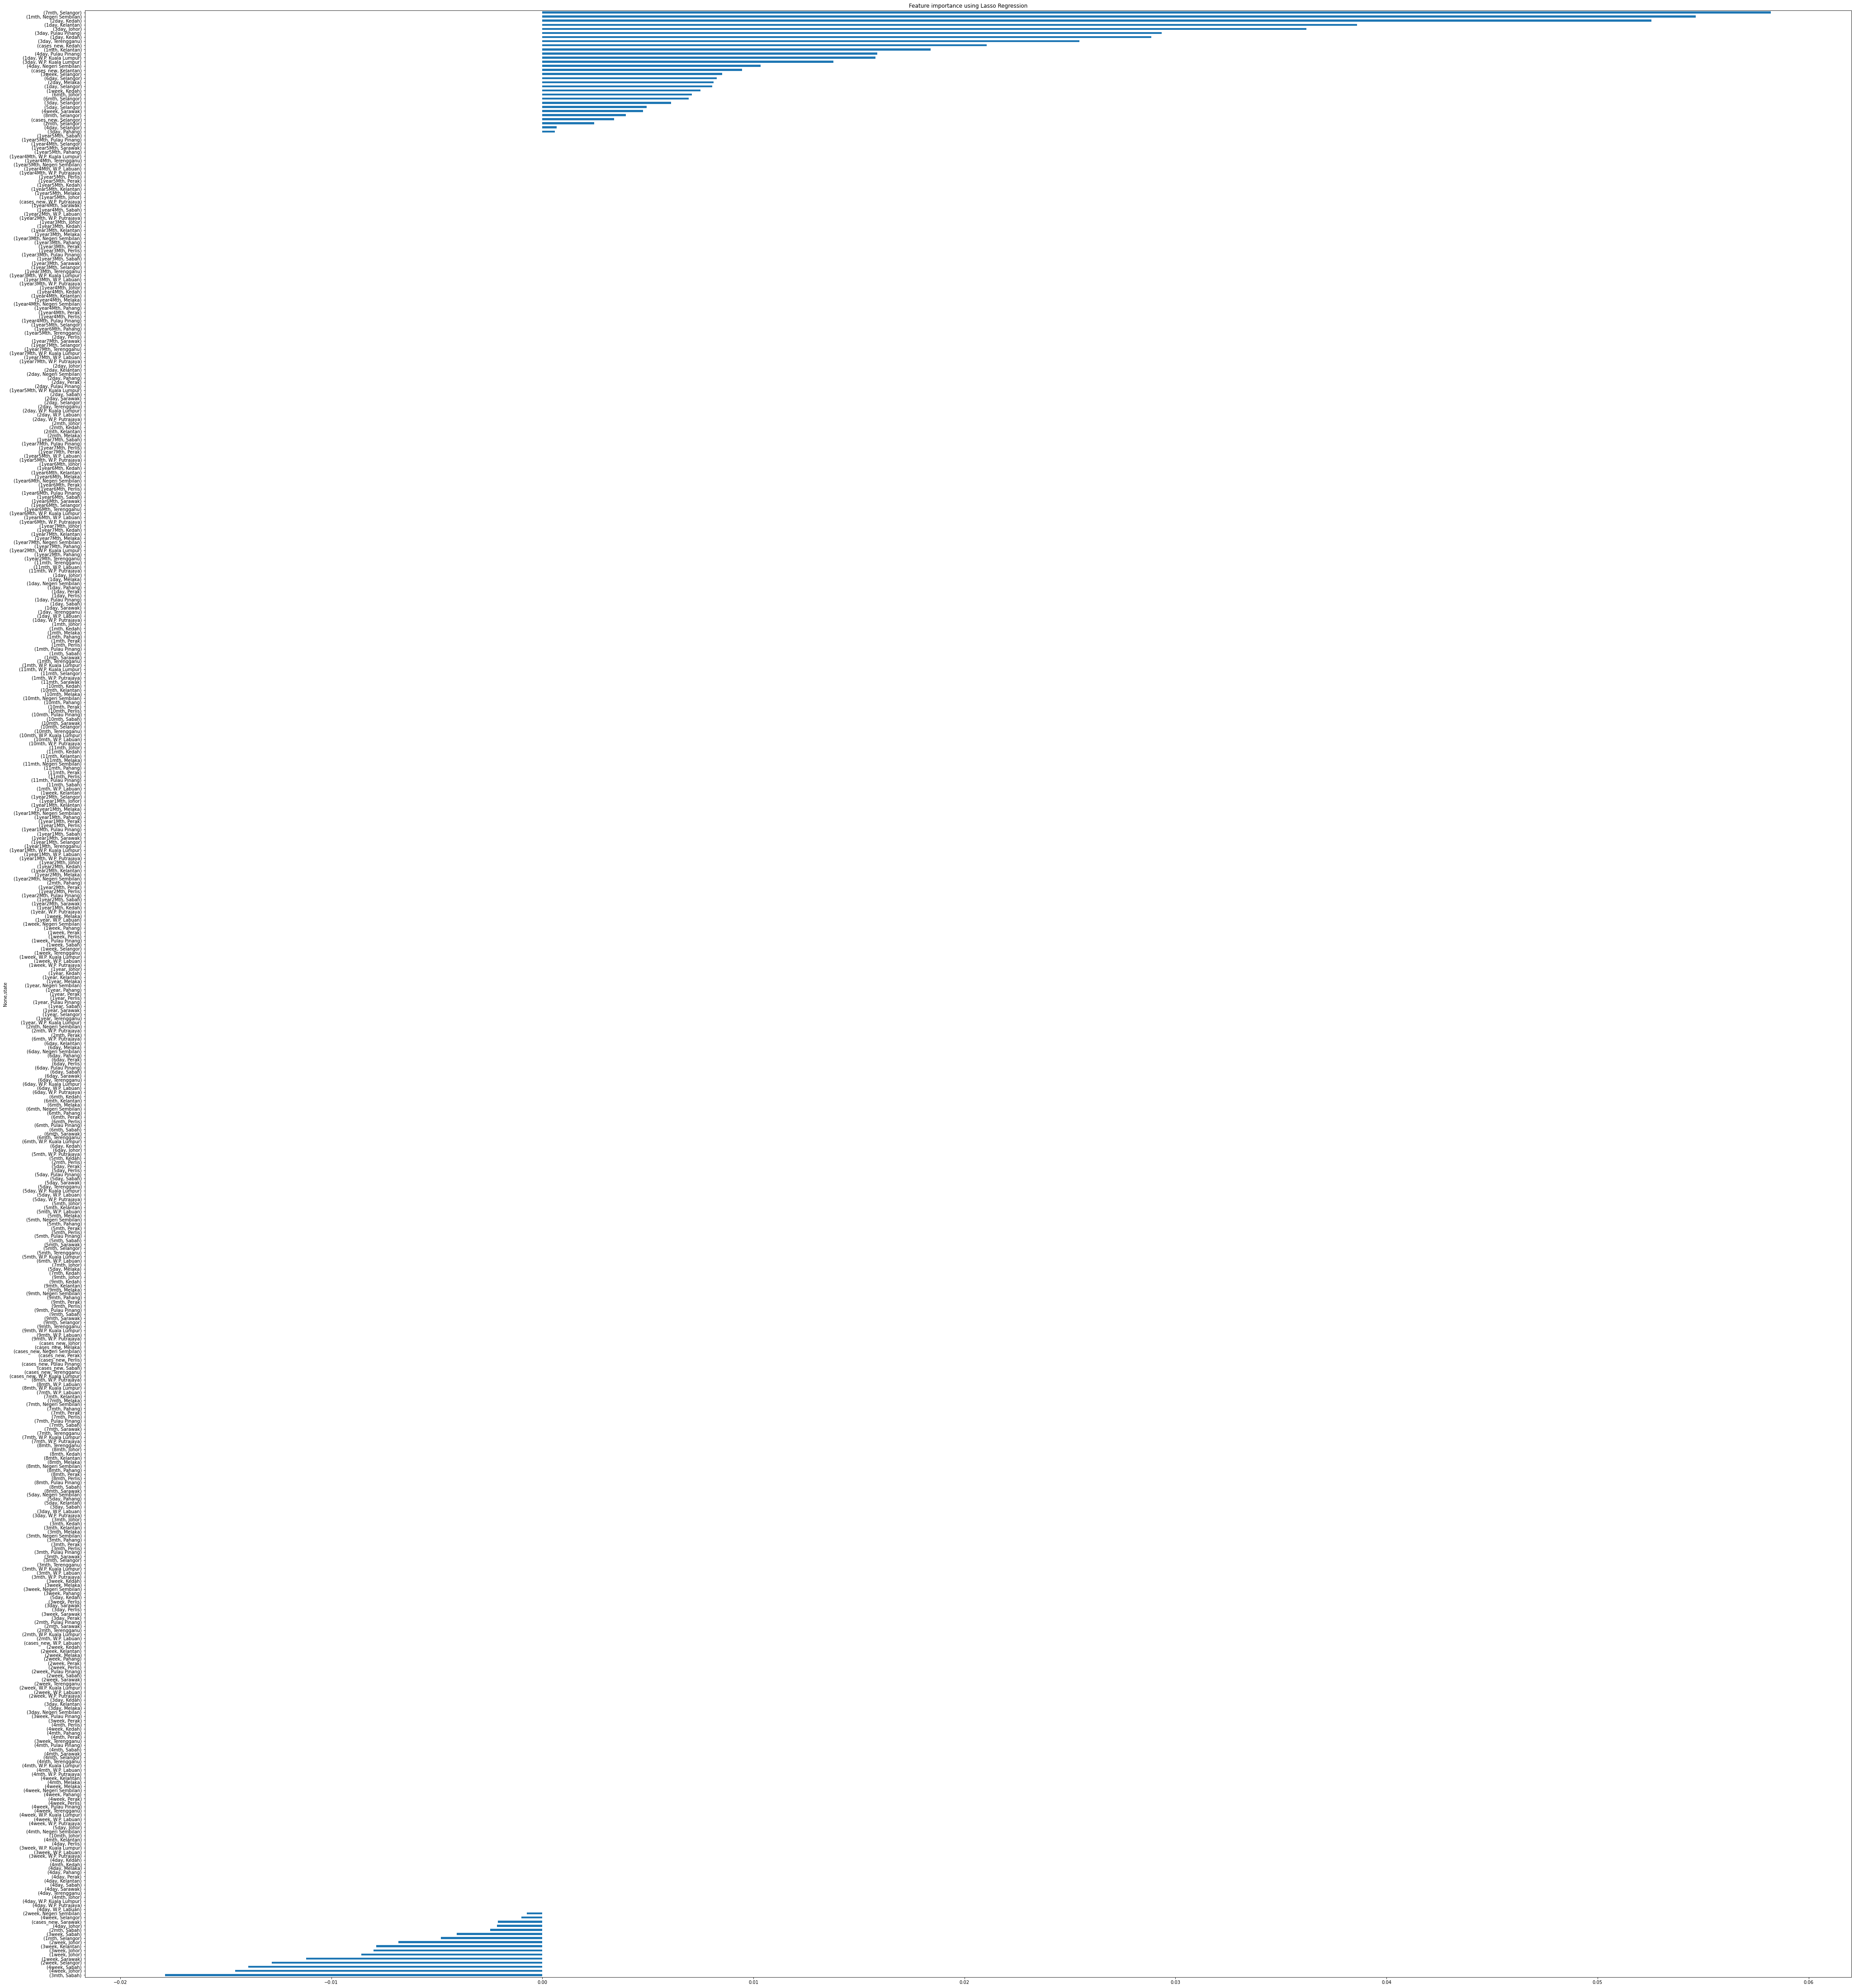

In [122]:
coefPahang = pd.Series(lassoReg.coef_, index = XPahang.columns)
imp_coefPahang = coefPahang.sort_values()
plt.rcParams['figure.figsize'] = (70.0, 80.0)
imp_coefPahang.plot(kind = "barh")
plt.title("Feature importance using Lasso Regression")

## Important Features


### Pahang

In [123]:
pahangRfe = selected_rfe_features_Pahang[rferank1Pahang].reset_index().drop(['index','Ranking'],axis = 'columns')
pahangBo = selected_rf_features_Pahang[rank1Pahang].reset_index().drop(['index','Ranking'],axis = 'columns')

# pahangImp = pahangBo.merge(pahangRfe, on = )
pahangImp = pahangBo.append(pahangRfe,ignore_index=True).drop_duplicates()
XPahang = XPahang[pahangImp['Feature']]

### Kedah

In [124]:
kedahRfe = selected_rfe_features_Kedah[rferank1Kedah].reset_index().drop(['index','Ranking'],axis = 'columns')
kedahBo = selected_rf_features_Kedah[rank1Kedah].reset_index().drop(['index','Ranking'],axis = 'columns')

kedahImp = kedahBo.append(kedahRfe,ignore_index=True).drop_duplicates()
XKedah = XKedah[kedahImp['Feature']]

### Johor

In [125]:
johorRfe = selected_rfe_features_Johor[rferank1Johor].reset_index().drop(['index','Ranking'],axis = 'columns')
johorBo = selected_rf_features_Johor[rank1Johor].reset_index().drop(['index','Ranking'],axis = 'columns')

johorImp = johorBo.append(johorRfe,ignore_index=True).drop_duplicates()
XJohor = XJohor[johorImp['Feature']]

### Selangor

In [126]:
selangorRfe = selected_rfe_features_Selangor[rferank1Selangor].reset_index().drop(['index','Ranking'],axis = 'columns')
selangorBo = selected_rf_features_Selangor[rank1Selangor].reset_index().drop(['index','Ranking'],axis = 'columns')

selangorImp = selangorBo.append(selangorRfe,ignore_index=True).drop_duplicates()
XSelangor = XSelangor[selangorImp['Feature']]

# Building a model


In [127]:
pd.set_option('max_rows', 99999)

### Discretization of Data for Classifier

In [128]:
johorDiscritized = cases_state[cases_state['state'] == 'Johor'].reset_index()
pahangDiscritized = cases_state[cases_state['state'] == 'Pahang'].reset_index()
kedahDiscritized = cases_state[cases_state['state'] == 'Kedah'].reset_index()
selangorDiscritized = cases_state[cases_state['state'] == 'Selangor'].reset_index()
'''
mask = (data['column2'] == 2) & (data['column1'] > 90)
data['column2'][mask] = 3
'''
discritized = [johorDiscritized,pahangDiscritized,kedahDiscritized,selangorDiscritized]
for x in discritized:
  mask1 = x['cases_new'] <= np.percentile(x.cases_new, 25)
  mask2 = (x['cases_new'] > np.percentile(x.cases_new, 25)) & (x['cases_new'] <= np.percentile(x.cases_new, 50))
  mask3 = (x['cases_new'] > np.percentile(x.cases_new, 50)) & (x['cases_new'] <= np.percentile(x.cases_new, 75))
  mask4 = (x['cases_new'] > np.percentile(x.cases_new, 75)) & (x['cases_new'] <= np.percentile(x.cases_new, 100))
  #x['cases_new'][x['cases_new'] == 0] = 'low'
  x['cases_new'][mask1] = 'low'
  x['cases_new'][mask2] = 'medium'
  x['cases_new'][mask3] = 'high'
  x['cases_new'][mask4] = 'very high'

johorDiscritized = johorDiscritized['cases_new']
pahangDiscritized = pahangDiscritized['cases_new']
kedahDiscritized = kedahDiscritized['cases_new']
selangorDiscritized = selangorDiscritized['cases_new']

### Splitting dataset

In [129]:
pt_msia.columns

MultiIndex([(    '10mth',             'Johor'),
            (    '10mth',             'Kedah'),
            (    '10mth',          'Kelantan'),
            (    '10mth',            'Melaka'),
            (    '10mth',   'Negeri Sembilan'),
            (    '10mth',            'Pahang'),
            (    '10mth',             'Perak'),
            (    '10mth',            'Perlis'),
            (    '10mth',      'Pulau Pinang'),
            (    '10mth',             'Sabah'),
            ...
            ('cases_new',             'Perak'),
            ('cases_new',            'Perlis'),
            ('cases_new',      'Pulau Pinang'),
            ('cases_new',             'Sabah'),
            ('cases_new',           'Sarawak'),
            ('cases_new',          'Selangor'),
            ('cases_new',        'Terengganu'),
            ('cases_new', 'W.P. Kuala Lumpur'),
            ('cases_new',       'W.P. Labuan'),
            ('cases_new',    'W.P. Putrajaya')],
           names=[None,

In [287]:
from sklearn.model_selection import train_test_split

XPahang_train, XPahang_test, yPahang_train, yPahang_test = train_test_split(XPahang, yPahang, test_size = 0.25, random_state = 0)
XKedah_train, XKedah_test, yKedah_train, yKedah_test = train_test_split(XKedah, yKedah, test_size = 0.25, random_state = 0)
XSelangor_train, XSelangor_test, ySelangor_train, ySelangor_test = train_test_split(XSelangor, ySelangor, test_size = 0.25, random_state = 0)
XJohor_train, XJohor_test, yJohor_train, yJohor_test = train_test_split(XJohor, yJohor, test_size = 0.25, random_state = 0)

XPahang_trainCLS, XPahang_testCLS, yPahang_trainCLS, yPahang_testCLS = train_test_split(XPahang, pahangDiscritized, test_size = 0.25, random_state = 0)
XKedah_trainCLS, XKedah_testCLS, yKedah_trainCLS, yKedah_testCLS = train_test_split(XKedah, kedahDiscritized, test_size = 0.25, random_state = 0)
XJohor_trainCLS, XJohor_testCLS, yJohor_trainCLS, yJohor_testCLS = train_test_split(XJohor, johorDiscritized, test_size = 0.25, random_state = 0)
XSelangor_trainCLS, XSelangor_testCLS, ySelangor_trainCLS, ySelangor_testCLS = train_test_split(XSelangor, selangorDiscritized, test_size = 0.25, random_state = 0)

In [131]:
XJohor_train, XJohor_test, yJohor_train, yJohor_test = train_test_split(XJohor, yJohor, test_size = 0.25, random_state = 0)

### Feature Scaling

In [132]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()


XPahang_train = sc.fit_transform(XPahang_train)
XPahang_test = sc.transform(XPahang_test)

XKedah_train = sc.fit_transform(XKedah_train)
XKedah_test = sc.transform(XKedah_test)

XJohor_train = sc.fit_transform(XJohor_train)
XJohor_test = sc.transform(XJohor_test)

XSelangor_train = sc.fit_transform(XSelangor_train)
XSelangor_test = sc.transform(XSelangor_test)

XPahang_trainCLS = sc.fit_transform(XPahang_trainCLS)
XPahang_testCLS = sc.transform(XPahang_testCLS)

XKedah_trainCLS = sc.fit_transform(XKedah_trainCLS)
XKedah_testCLS = sc.transform(XKedah_testCLS)

XJohor_trainCLS = sc.fit_transform(XJohor_trainCLS)
XJohor_testCLS = sc.transform(XJohor_testCLS)

XSelangor_trainCLS = sc.fit_transform(XSelangor_trainCLS)
XSelangor_testCLS = sc.transform(XSelangor_testCLS)


## Classfication

### Decision Tree Classification

#### Pahang

In [298]:
from sklearn.tree import DecisionTreeClassifier
DTclassifier_Pahang = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
DTclassifier_Pahang.fit(XPahang_trainCLS, yPahang_trainCLS)

DecisionTreeClassifier(criterion='entropy', random_state=0)

[[28  2  5  3]
 [ 1 42  4  0]
 [ 4 11  8  0]
 [ 6  0  1 33]]
0.75
              precision    recall  f1-score   support

        high       0.72      0.74      0.73        38
         low       0.76      0.89      0.82        47
      medium       0.44      0.35      0.39        23
   very high       0.92      0.82      0.87        40

    accuracy                           0.75       148
   macro avg       0.71      0.70      0.70       148
weighted avg       0.74      0.75      0.74       148



<AxesSubplot:>

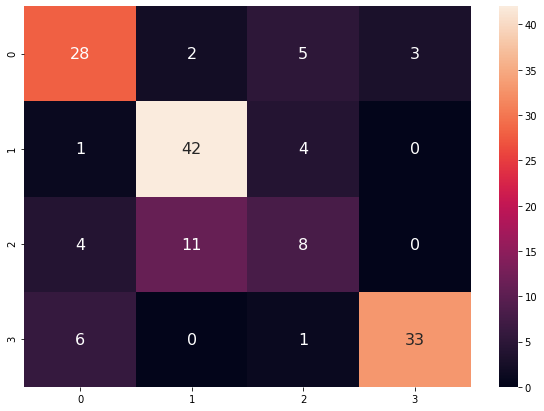

In [299]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
yPahang_pred = DTclassifier_Pahang.predict(XPahang_testCLS)
cmPahang = confusion_matrix(yPahang_testCLS, yPahang_pred)
print(cmPahang)
print(accuracy_score(yPahang_testCLS, yPahang_pred))
print(classification_report(yPahang_testCLS,yPahang_pred))
plt.figure(figsize=(10,7))
sns.heatmap(cmPahang,annot=True,annot_kws={"size": 16})

#### Kedah

In [301]:
DTclassifier_Kedah = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
DTclassifier_Kedah.fit(XKedah_trainCLS, yKedah_trainCLS)

DecisionTreeClassifier(criterion='entropy', random_state=0)

[[30  0  7  0]
 [ 0 27  7  0]
 [11  7 19  1]
 [ 4  0  1 34]]
0.7432432432432432
              precision    recall  f1-score   support

        high       0.67      0.81      0.73        37
         low       0.79      0.79      0.79        34
      medium       0.56      0.50      0.53        38
   very high       0.97      0.87      0.92        39

    accuracy                           0.74       148
   macro avg       0.75      0.74      0.74       148
weighted avg       0.75      0.74      0.74       148



<AxesSubplot:>

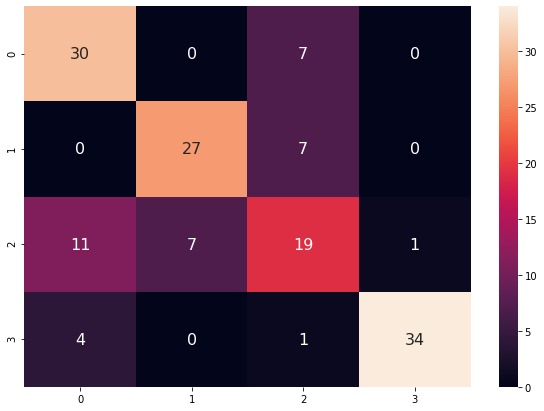

In [302]:
yKedah_pred = DTclassifier_Kedah.predict(XKedah_testCLS)
cmKedah = confusion_matrix(yKedah_testCLS, yKedah_pred)
print(cmKedah)
print(accuracy_score(yKedah_testCLS, yKedah_pred))
print(classification_report(yKedah_testCLS,yKedah_pred))
plt.figure(figsize=(10,7))
sns.heatmap(cmKedah,annot=True,annot_kws={"size": 16})

#### Johor

In [303]:
DTclassifier_Johor = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
DTclassifier_Johor.fit(XJohor_trainCLS, yJohor_trainCLS)

DecisionTreeClassifier(criterion='entropy', random_state=0)

[[37  0  4  4]
 [ 0 28  9  0]
 [ 2  8 20  0]
 [ 7  0  0 29]]
              precision    recall  f1-score   support

        high       0.80      0.82      0.81        45
         low       0.78      0.76      0.77        37
      medium       0.61      0.67      0.63        30
   very high       0.88      0.81      0.84        36

    accuracy                           0.77       148
   macro avg       0.77      0.76      0.76       148
weighted avg       0.78      0.77      0.77       148



<AxesSubplot:>

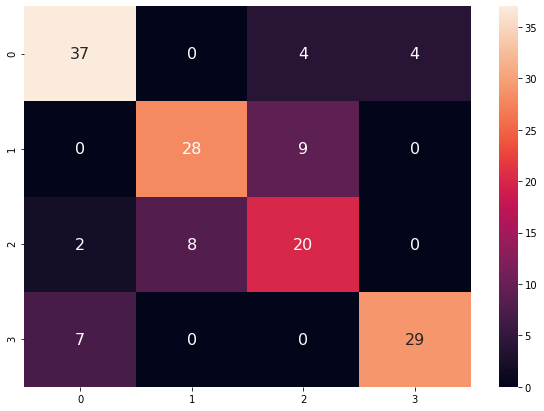

In [304]:
yJohor_pred = DTclassifier_Johor.predict(XJohor_testCLS)
cmJohor = confusion_matrix(yJohor_testCLS, yJohor_pred)
print(cmJohor)
accuracy_score(yJohor_testCLS, yJohor_pred)
print(classification_report(yJohor_testCLS,yJohor_pred))

plt.figure(figsize=(10,7))
sns.heatmap(cmJohor,annot=True,annot_kws={"size": 16})

#### Selangor

In [305]:
DTclassifier_Selangor = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
DTclassifier_Selangor.fit(XSelangor_trainCLS, ySelangor_trainCLS)

DecisionTreeClassifier(criterion='entropy', random_state=0)

[[34  0  3  5]
 [ 0 32  8  0]
 [ 0  5 24  0]
 [ 5  0  0 32]]
              precision    recall  f1-score   support

        high       0.87      0.81      0.84        42
         low       0.86      0.80      0.83        40
      medium       0.69      0.83      0.75        29
   very high       0.86      0.86      0.86        37

    accuracy                           0.82       148
   macro avg       0.82      0.83      0.82       148
weighted avg       0.83      0.82      0.83       148



<AxesSubplot:>

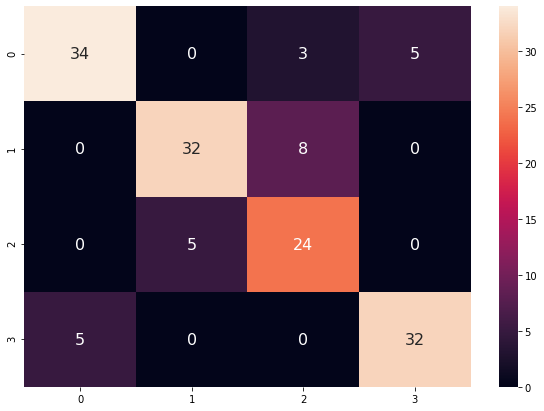

In [306]:
ySelangor_pred = DTclassifier_Selangor.predict(XSelangor_testCLS)
cmSelangor = confusion_matrix(ySelangor_testCLS, ySelangor_pred)
print(cmSelangor)
accuracy_score(ySelangor_testCLS, ySelangor_pred)
print(classification_report(ySelangor_testCLS,ySelangor_pred))

plt.figure(figsize=(10,7))
sns.heatmap(cmSelangor,annot=True,annot_kws={"size": 16})

### KNN


#### Pahang

In [210]:
from sklearn.neighbors import KNeighborsClassifier
KNNclassifier_Pahang = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
KNNclassifier_Pahang.fit(XPahang_trainCLS, yPahang_trainCLS)

KNeighborsClassifier()

[[31  3  2  2]
 [ 1 45  1  0]
 [ 8 14  1  0]
 [ 7  1  0 32]]
              precision    recall  f1-score   support

        high       0.66      0.82      0.73        38
         low       0.71      0.96      0.82        47
      medium       0.25      0.04      0.07        23
   very high       0.94      0.80      0.86        40

    accuracy                           0.74       148
   macro avg       0.64      0.65      0.62       148
weighted avg       0.69      0.74      0.69       148



<AxesSubplot:>

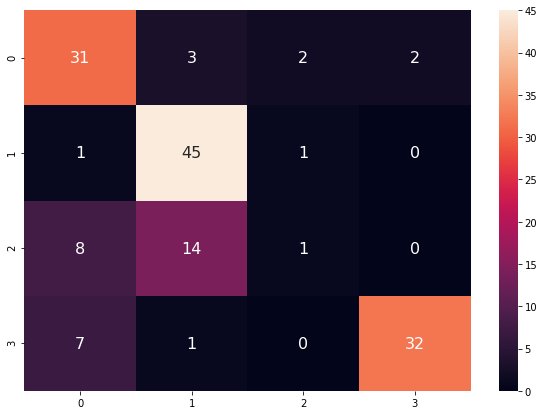

In [213]:
y_predPahang = KNNclassifier_Pahang.predict(XPahang_testCLS)
cmPahang = confusion_matrix(yPahang_testCLS, y_predPahang)
print(cmPahang)
accuracy_score(yPahang_testCLS, y_predPahang)
print(classification_report(yPahang_testCLS,y_predPahang))
plt.figure(figsize=(10,7))
sns.heatmap(cmPahang,annot=True,annot_kws={"size": 16})

#### Kedah

In [144]:
KNNclassifier_Kedah = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
KNNclassifier_Kedah.fit(XKedah_trainCLS, yKedah_trainCLS)

KNeighborsClassifier()

[[31  1  3  2]
 [ 0 31  3  0]
 [ 7 15 16  0]
 [ 5  0  0 34]]
              precision    recall  f1-score   support

        high       0.72      0.84      0.77        37
         low       0.66      0.91      0.77        34
      medium       0.73      0.42      0.53        38
   very high       0.94      0.87      0.91        39

    accuracy                           0.76       148
   macro avg       0.76      0.76      0.75       148
weighted avg       0.77      0.76      0.75       148



<AxesSubplot:>

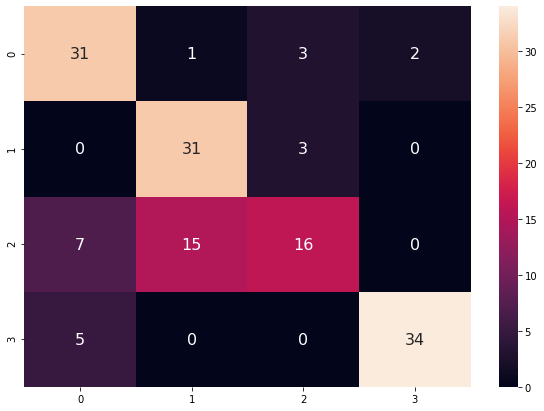

In [215]:
y_predKedah = KNNclassifier_Kedah.predict(XKedah_testCLS)
cmKedah = confusion_matrix(yKedah_testCLS, y_predKedah)
print(cmKedah)
accuracy_score(yKedah_testCLS, y_predKedah)
print(classification_report(yKedah_testCLS,y_predKedah))
plt.figure(figsize=(10,7))
sns.heatmap(cmKedah,annot=True,annot_kws={"size": 16})

#### Johor

In [146]:
KNNclassifier_Johor = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
KNNclassifier_Johor.fit(XJohor_trainCLS, yJohor_trainCLS)

KNeighborsClassifier()

[[37  0  3  5]
 [ 0 29  8  0]
 [ 0 16 14  0]
 [11  0  0 25]]
              precision    recall  f1-score   support

        high       0.77      0.82      0.80        45
         low       0.64      0.78      0.71        37
      medium       0.56      0.47      0.51        30
   very high       0.83      0.69      0.76        36

    accuracy                           0.71       148
   macro avg       0.70      0.69      0.69       148
weighted avg       0.71      0.71      0.71       148



<AxesSubplot:>

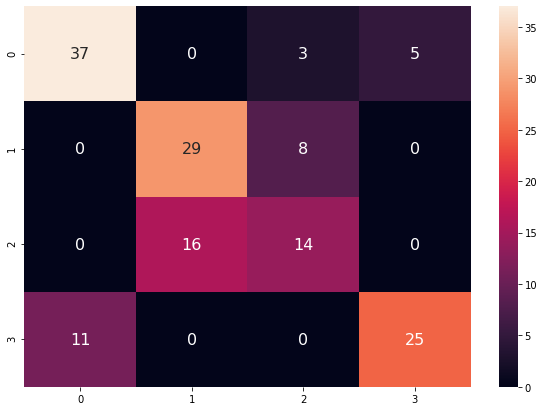

In [216]:
y_predJohor = KNNclassifier_Johor.predict(XJohor_testCLS)
cmJohor = confusion_matrix(yJohor_testCLS, y_predJohor)
print(cmJohor)
accuracy_score(yJohor_testCLS, y_predJohor)
print(classification_report(yJohor_testCLS,y_predJohor))
plt.figure(figsize=(10,7))
sns.heatmap(cmJohor,annot=True,annot_kws={"size": 16})

#### Selangor

In [148]:
KNNclassifier_Selangor = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
KNNclassifier_Selangor.fit(XSelangor_trainCLS, ySelangor_trainCLS)

KNeighborsClassifier()

[[39  0  1  2]
 [ 0 35  5  0]
 [ 0  4 25  0]
 [ 5  0  0 32]]
              precision    recall  f1-score   support

        high       0.89      0.93      0.91        42
         low       0.90      0.88      0.89        40
      medium       0.81      0.86      0.83        29
   very high       0.94      0.86      0.90        37

    accuracy                           0.89       148
   macro avg       0.88      0.88      0.88       148
weighted avg       0.89      0.89      0.89       148



<AxesSubplot:>

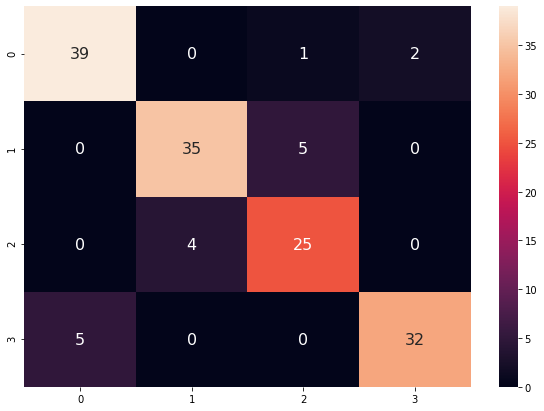

In [217]:
y_predSelangor = KNNclassifier_Selangor.predict(XSelangor_testCLS)
cmSelangor = confusion_matrix(ySelangor_testCLS, y_predSelangor)
print(cmSelangor)
accuracy_score(ySelangor_testCLS, y_predSelangor)
print(classification_report(ySelangor_testCLS,y_predSelangor))
plt.figure(figsize=(10,7))
sns.heatmap(cmSelangor,annot=True,annot_kws={"size": 16})

### Logistic Regression

#### Pahang

In [150]:
from sklearn.linear_model import LogisticRegression
LRclassifier_Pahang = LogisticRegression(random_state = 0)
LRclassifier_Pahang.fit(XPahang_trainCLS, yPahang_trainCLS)

LogisticRegression(random_state=0)

[[23  8  4  3]
 [ 0 46  1  0]
 [ 3 18  2  0]
 [ 7  0  1 32]]
              precision    recall  f1-score   support

        high       0.91      0.71      0.80        42
         low       0.56      1.00      0.71        40
      medium       0.12      0.03      0.05        29
   very high       0.94      0.89      0.92        37

    accuracy                           0.70       148
   macro avg       0.63      0.66      0.62       148
weighted avg       0.67      0.70      0.66       148



<AxesSubplot:>

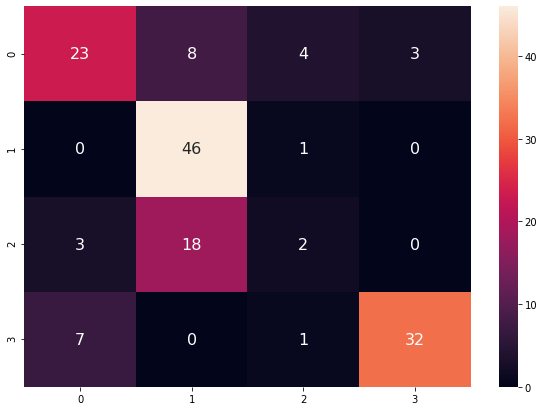

In [218]:
y_predPahang = LRclassifier_Pahang.predict(XPahang_testCLS)
cmPahang = confusion_matrix(yPahang_testCLS, y_predPahang)
print(cmPahang)
accuracy_score(yPahang_testCLS, y_predPahang)
print(classification_report(ySelangor_testCLS,y_predPahang))
plt.figure(figsize=(10,7))
sns.heatmap(cmPahang,annot=True,annot_kws={"size": 16})

#### Kedah

In [152]:
LRclassifier_Kedah = LogisticRegression(random_state = 0)
LRclassifier_Kedah.fit(XKedah_trainCLS, yKedah_trainCLS)

LogisticRegression(random_state=0)

[[26  1  8  2]
 [ 0 33  1  0]
 [ 7 18 13  0]
 [ 8  0  1 30]]
              precision    recall  f1-score   support

        high       0.63      0.70      0.67        37
         low       0.63      0.97      0.77        34
      medium       0.57      0.34      0.43        38
   very high       0.94      0.77      0.85        39

    accuracy                           0.69       148
   macro avg       0.69      0.70      0.68       148
weighted avg       0.70      0.69      0.68       148



<AxesSubplot:>

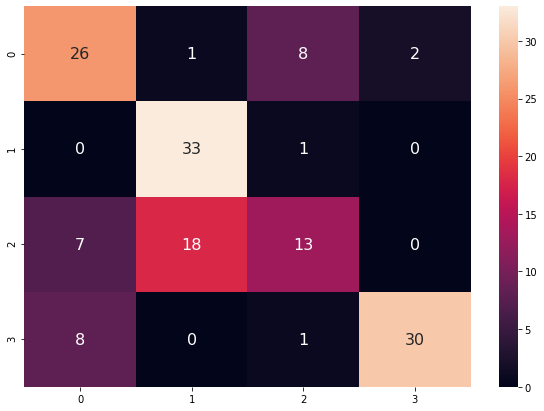

In [219]:
y_predKedah = LRclassifier_Kedah.predict(XKedah_testCLS)
cmKedah = confusion_matrix(yKedah_testCLS, y_predKedah)
print(cmKedah)
accuracy_score(yKedah_testCLS, y_predKedah)
print(classification_report(yKedah_testCLS,y_predKedah))
plt.figure(figsize=(10,7))
sns.heatmap(cmKedah,annot=True,annot_kws={"size": 16})

#### Johor

In [154]:
classifier_Johor = LogisticRegression(random_state = 0)
classifier_Johor.fit(XJohor_trainCLS, yJohor_trainCLS)

LogisticRegression(random_state=0)

[[37  2  3  3]
 [ 0 31  6  0]
 [ 0 12 18  0]
 [ 9  1  0 26]]
              precision    recall  f1-score   support

        high       0.80      0.82      0.81        45
         low       0.67      0.84      0.75        37
      medium       0.67      0.60      0.63        30
   very high       0.90      0.72      0.80        36

    accuracy                           0.76       148
   macro avg       0.76      0.75      0.75       148
weighted avg       0.77      0.76      0.76       148



<AxesSubplot:>

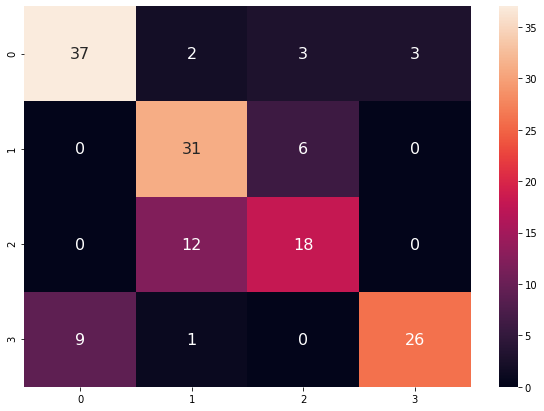

In [223]:
y_predJohor = classifier_Johor.predict(XJohor_testCLS)
cmJohor = confusion_matrix(yJohor_testCLS, y_predJohor)
print(cmJohor)
accuracy_score(yJohor_testCLS, y_predJohor)
print(classification_report(yJohor_testCLS,y_predJohor))
plt.figure(figsize=(10,7))
sns.heatmap(cmJohor,annot=True,annot_kws={"size": 16})

#### Selangor

In [156]:
classifier_Selangor = LogisticRegression(random_state = 0)
classifier_Selangor.fit(XSelangor_trainCLS, ySelangor_trainCLS)

LogisticRegression(random_state=0)

[[38  0  2  2]
 [ 0 36  4  0]
 [ 1  4 24  0]
 [ 2  0  0 35]]
              precision    recall  f1-score   support

        high       0.93      0.90      0.92        42
         low       0.90      0.90      0.90        40
      medium       0.80      0.83      0.81        29
   very high       0.95      0.95      0.95        37

    accuracy                           0.90       148
   macro avg       0.89      0.89      0.89       148
weighted avg       0.90      0.90      0.90       148



<AxesSubplot:>

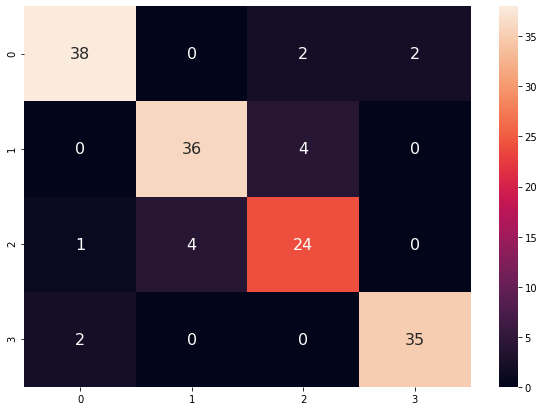

In [224]:
y_predSelangor = classifier_Selangor.predict(XSelangor_testCLS)
cmSelangor = confusion_matrix(ySelangor_testCLS, y_predSelangor)
print(cmSelangor)
accuracy_score(ySelangor_testCLS, y_predSelangor)
print(classification_report(ySelangor_testCLS,y_predSelangor))
plt.figure(figsize=(10,7))
sns.heatmap(cmSelangor,annot=True,annot_kws={"size": 16})

### Naive Bayes


#### Pahang

In [228]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(XPahang_trainCLS, yPahang_trainCLS)

GaussianNB()

[[25  4  5  4]
 [ 0 45  2  0]
 [ 4 17  2  0]
 [ 8  0  1 31]]
              precision    recall  f1-score   support

        high       0.68      0.66      0.67        38
         low       0.68      0.96      0.80        47
      medium       0.20      0.09      0.12        23
   very high       0.89      0.78      0.83        40

    accuracy                           0.70       148
   macro avg       0.61      0.62      0.60       148
weighted avg       0.66      0.70      0.67       148



<AxesSubplot:>

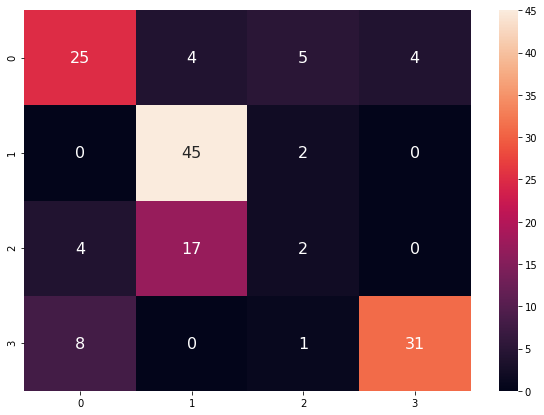

In [229]:
y_pred = classifier.predict(XPahang_testCLS)
cm = confusion_matrix(yPahang_testCLS, y_pred)
print(cm)
accuracy_score(yPahang_testCLS, y_pred)
print(classification_report(yPahang_testCLS,y_pred))
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,annot_kws={"size": 16})

#### Kedah

In [231]:
classifier = GaussianNB()
classifier.fit(XKedah_trainCLS, yKedah_trainCLS)

GaussianNB()

[[23  2 11  1]
 [ 0 32  2  0]
 [ 5 22 11  0]
 [ 5  0  1 33]]
              precision    recall  f1-score   support

        high       0.70      0.62      0.66        37
         low       0.57      0.94      0.71        34
      medium       0.44      0.29      0.35        38
   very high       0.97      0.85      0.90        39

    accuracy                           0.67       148
   macro avg       0.67      0.67      0.66       148
weighted avg       0.67      0.67      0.66       148



<AxesSubplot:>

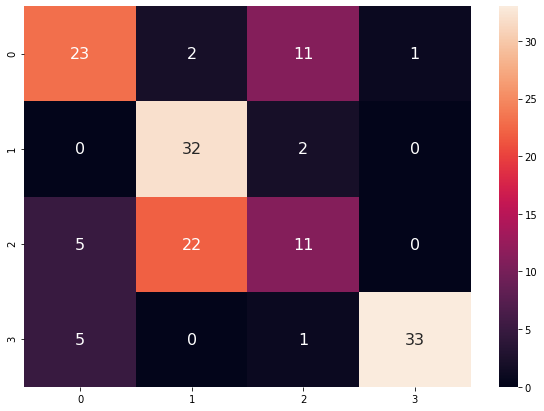

In [232]:
y_pred = classifier.predict(XKedah_testCLS)
cm = confusion_matrix(yKedah_testCLS, y_pred)
print(cm)
accuracy_score(yKedah_testCLS, y_pred)
print(classification_report(yKedah_testCLS,y_pred))
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,annot_kws={"size": 16})

#### Johor

In [307]:
classifier = GaussianNB()
classifier.fit(XJohor_trainCLS, yJohor_trainCLS)

GaussianNB()

[[35  0  4  6]
 [ 0 34  3  0]
 [ 0  9 21  0]
 [11  0  0 25]]
              precision    recall  f1-score   support

        high       0.76      0.78      0.77        45
         low       0.79      0.92      0.85        37
      medium       0.75      0.70      0.72        30
   very high       0.81      0.69      0.75        36

    accuracy                           0.78       148
   macro avg       0.78      0.77      0.77       148
weighted avg       0.78      0.78      0.77       148



<AxesSubplot:>

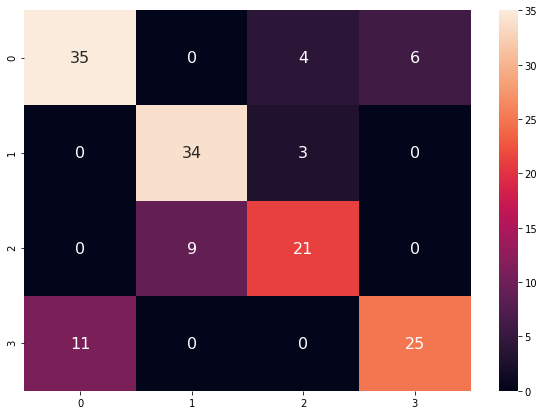

In [308]:
y_pred = classifier.predict(XJohor_testCLS)
cm = confusion_matrix(yJohor_testCLS, y_pred)
print(cm)
accuracy_score(yJohor_testCLS, y_pred)
print(classification_report(yJohor_testCLS,y_pred))
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,annot_kws={"size": 16})

#### Selangor


In [235]:
classifier = GaussianNB()
classifier.fit(XSelangor_trainCLS, ySelangor_trainCLS)

GaussianNB()

[[40  0  2  0]
 [ 0 38  2  0]
 [ 0  8 21  0]
 [ 6  0  0 31]]
              precision    recall  f1-score   support

        high       0.87      0.95      0.91        42
         low       0.83      0.95      0.88        40
      medium       0.84      0.72      0.78        29
   very high       1.00      0.84      0.91        37

    accuracy                           0.88       148
   macro avg       0.88      0.87      0.87       148
weighted avg       0.88      0.88      0.88       148



<AxesSubplot:>

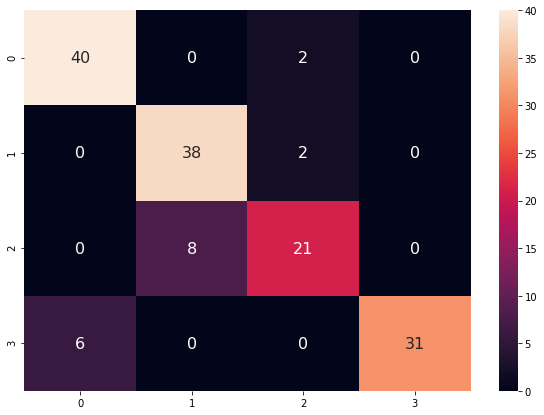

In [236]:
y_pred = classifier.predict(XSelangor_testCLS)
cm = confusion_matrix(ySelangor_testCLS, y_pred)
print(cm)
accuracy_score(ySelangor_testCLS, y_pred)
print(classification_report(ySelangor_testCLS,y_pred))
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,annot_kws={"size": 16})

### Random Forest Classification

### Pahang

In [237]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(XPahang_trainCLS, yPahang_trainCLS)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

[[34  1  1  2]
 [ 0 47  0  0]
 [ 4 18  1  0]
 [ 7  1  0 32]]
              precision    recall  f1-score   support

        high       0.76      0.89      0.82        38
         low       0.70      1.00      0.82        47
      medium       0.50      0.04      0.08        23
   very high       0.94      0.80      0.86        40

    accuracy                           0.77       148
   macro avg       0.72      0.68      0.65       148
weighted avg       0.75      0.77      0.72       148



<AxesSubplot:>

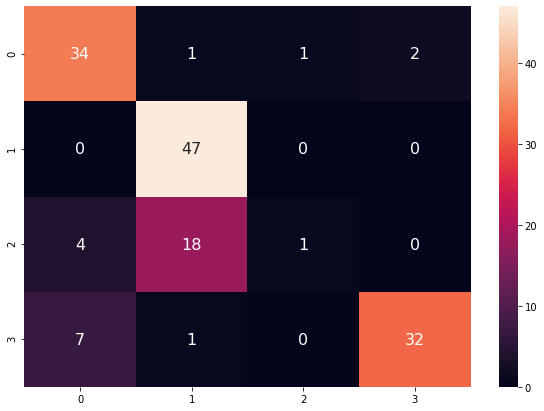

In [238]:
y_pred = classifier.predict(XPahang_testCLS)
cm = confusion_matrix(yPahang_testCLS, y_pred)
print(cm)
accuracy_score(yPahang_testCLS, y_pred)
print(classification_report(yPahang_testCLS,y_pred))
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,annot_kws={"size": 16})

### Kedah

In [239]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(XKedah_trainCLS, yKedah_trainCLS)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

[[32  0  4  1]
 [ 0 30  4  0]
 [ 9  9 20  0]
 [ 4  0  0 35]]
              precision    recall  f1-score   support

        high       0.71      0.86      0.78        37
         low       0.77      0.88      0.82        34
      medium       0.71      0.53      0.61        38
   very high       0.97      0.90      0.93        39

    accuracy                           0.79       148
   macro avg       0.79      0.79      0.79       148
weighted avg       0.79      0.79      0.79       148



<AxesSubplot:>

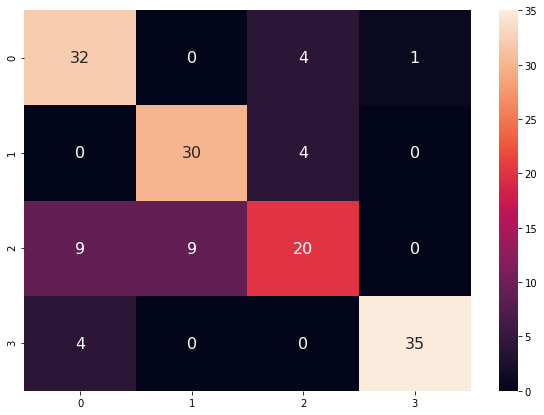

In [240]:
y_pred = classifier.predict(XKedah_testCLS)
cm = confusion_matrix(yKedah_testCLS, y_pred)
print(cm)
accuracy_score(yKedah_testCLS, y_pred)
print(classification_report(yKedah_testCLS,y_pred))
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,annot_kws={"size": 16})

### Johor

In [241]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(XJohor_trainCLS, yJohor_trainCLS)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

[[37  0  3  5]
 [ 0 34  3  0]
 [ 0 12 18  0]
 [ 9  0  0 27]]
              precision    recall  f1-score   support

        high       0.80      0.82      0.81        45
         low       0.74      0.92      0.82        37
      medium       0.75      0.60      0.67        30
   very high       0.84      0.75      0.79        36

    accuracy                           0.78       148
   macro avg       0.78      0.77      0.77       148
weighted avg       0.79      0.78      0.78       148



<AxesSubplot:>

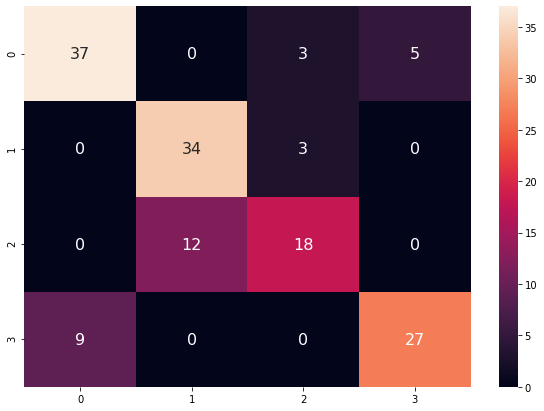

In [242]:
y_pred = classifier.predict(XJohor_testCLS)
cm = confusion_matrix(yJohor_testCLS, y_pred)
print(cm)
accuracy_score(yJohor_testCLS, y_pred)
print(classification_report(yJohor_testCLS,y_pred))
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,annot_kws={"size": 16})

### Selangor

In [243]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(XSelangor_trainCLS, ySelangor_trainCLS)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

[[38  0  1  3]
 [ 0 38  2  0]
 [ 2  7 20  0]
 [ 4  0  0 33]]
              precision    recall  f1-score   support

        high       0.86      0.90      0.88        42
         low       0.84      0.95      0.89        40
      medium       0.87      0.69      0.77        29
   very high       0.92      0.89      0.90        37

    accuracy                           0.87       148
   macro avg       0.87      0.86      0.86       148
weighted avg       0.87      0.87      0.87       148



<AxesSubplot:>

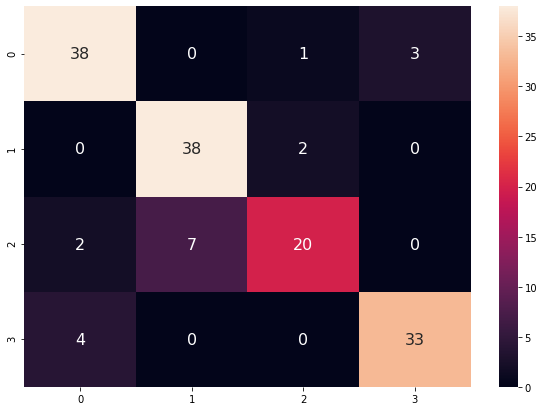

In [244]:
y_pred = classifier.predict(XSelangor_testCLS)
cm = confusion_matrix(ySelangor_testCLS, y_pred)
print(cm)
accuracy_score(ySelangor_testCLS, y_pred)
print(classification_report(ySelangor_testCLS,y_pred))
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,annot_kws={"size": 16})

### Support Vector Classification (Linear)

### Pahang 

In [245]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(XPahang_trainCLS, yPahang_trainCLS)

SVC(kernel='linear', random_state=0)

[[24  8  3  3]
 [ 0 46  1  0]
 [ 4 17  2  0]
 [ 5  0  1 34]]
              precision    recall  f1-score   support

        high       0.73      0.63      0.68        38
         low       0.65      0.98      0.78        47
      medium       0.29      0.09      0.13        23
   very high       0.92      0.85      0.88        40

    accuracy                           0.72       148
   macro avg       0.64      0.64      0.62       148
weighted avg       0.69      0.72      0.68       148



<AxesSubplot:>

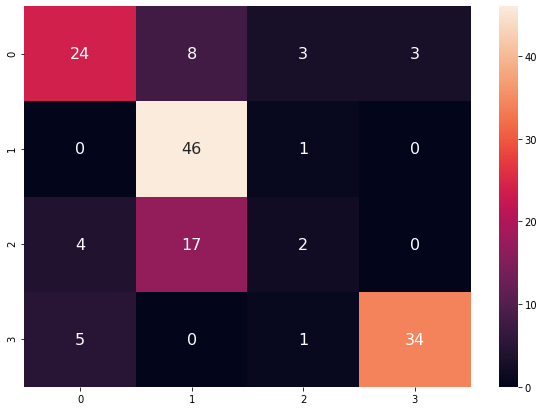

In [246]:
y_pred = classifier.predict(XPahang_testCLS)
cm = confusion_matrix(yPahang_testCLS, y_pred)
print(cm)
accuracy_score(yPahang_testCLS, y_pred)
print(classification_report(yPahang_testCLS,y_pred))
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,annot_kws={"size": 16})

### Kedah

In [247]:
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(XKedah_trainCLS, yKedah_trainCLS)

SVC(kernel='linear', random_state=0)

[[27  1  7  2]
 [ 0 32  2  0]
 [ 6 14 18  0]
 [ 9  0  1 29]]
              precision    recall  f1-score   support

        high       0.64      0.73      0.68        37
         low       0.68      0.94      0.79        34
      medium       0.64      0.47      0.55        38
   very high       0.94      0.74      0.83        39

    accuracy                           0.72       148
   macro avg       0.73      0.72      0.71       148
weighted avg       0.73      0.72      0.71       148



<AxesSubplot:>

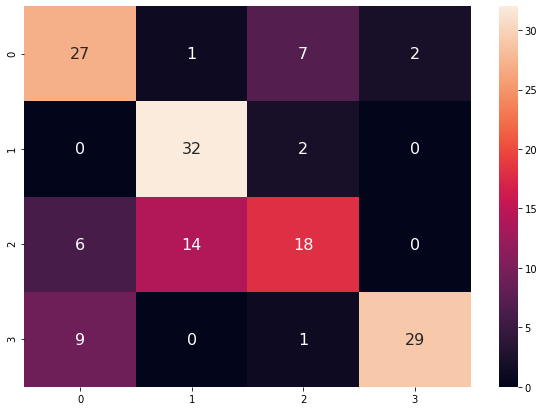

In [248]:
y_pred = classifier.predict(XKedah_testCLS)
cm = confusion_matrix(yKedah_testCLS, y_pred)
print(cm)
accuracy_score(yKedah_testCLS, y_pred)
print(classification_report(yKedah_testCLS,y_pred))
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,annot_kws={"size": 16})

### Johor

In [250]:
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(XJohor_trainCLS, yJohor_trainCLS)

SVC(kernel='linear', random_state=0)

[[39  1  2  3]
 [ 0 33  4  0]
 [ 0 15 15  0]
 [11  0  0 25]]
              precision    recall  f1-score   support

        high       0.78      0.87      0.82        45
         low       0.67      0.89      0.77        37
      medium       0.71      0.50      0.59        30
   very high       0.89      0.69      0.78        36

    accuracy                           0.76       148
   macro avg       0.77      0.74      0.74       148
weighted avg       0.77      0.76      0.75       148



<AxesSubplot:>

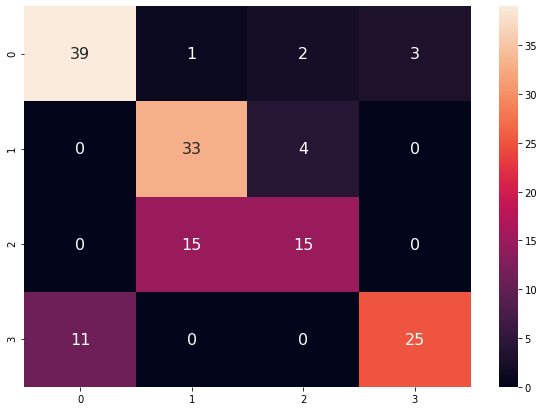

In [251]:
y_pred = classifier.predict(XJohor_testCLS)
cm = confusion_matrix(yJohor_testCLS, y_pred)
print(cm)
accuracy_score(yJohor_testCLS, y_pred)
print(classification_report(yJohor_testCLS,y_pred))
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,annot_kws={"size": 16})

### Selangor

In [252]:
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(XSelangor_trainCLS, ySelangor_trainCLS)

SVC(kernel='linear', random_state=0)

[[37  0  2  3]
 [ 0 39  1  0]
 [ 1  5 23  0]
 [ 2  0  0 35]]
              precision    recall  f1-score   support

        high       0.93      0.88      0.90        42
         low       0.89      0.97      0.93        40
      medium       0.88      0.79      0.84        29
   very high       0.92      0.95      0.93        37

    accuracy                           0.91       148
   macro avg       0.90      0.90      0.90       148
weighted avg       0.91      0.91      0.90       148



<AxesSubplot:>

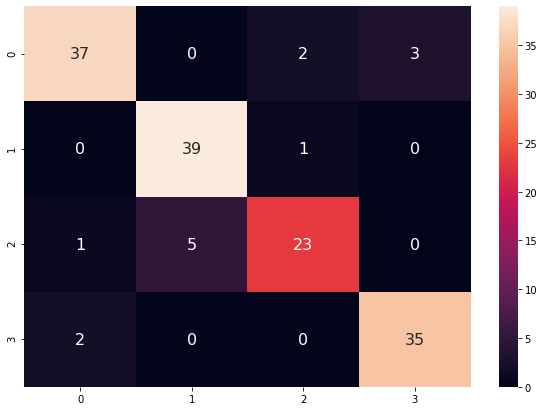

In [253]:
y_pred = classifier.predict(XSelangor_testCLS)
cm = confusion_matrix(ySelangor_testCLS, y_pred)
print(cm)
accuracy_score(ySelangor_testCLS, y_pred)
print(classification_report(ySelangor_testCLS,y_pred))
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,annot_kws={"size": 16})

## Regression

### Decision Tree Regression

#### Pahang

In [295]:
from sklearn.tree import DecisionTreeRegressor
DTregressorPahang = DecisionTreeRegressor(random_state = 0)
DTregressorPahang.fit(XPahang_train, yPahang_train)

DecisionTreeRegressor(random_state=0)

In [296]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
yPahang_pred = DTregressorPahang.predict(XPahang_test)
print("R2",r2_score(yPahang_test, yPahang_pred))
print("MAE",mean_absolute_error(yPahang_test,yPahang_pred))

R2 0.831144794928134
MAE 32.439189189189186


#### Kedah

In [256]:
DTregressorKedah = DecisionTreeRegressor(random_state = 0)
DTregressorKedah.fit(XKedah_train, yKedah_train)
yKedahDT_pred = DTregressorKedah.predict(XKedah_test)
print("R2", r2_score(yKedah_test, yKedahDT_pred))
print("MAE",mean_absolute_error(yKedah_test,yKedahDT_pred))

R2 0.9317980019810209
MAE 43.182432432432435


#### Johor

In [257]:
DTregressorJohor = DecisionTreeRegressor(random_state = 0)
DTregressorJohor.fit(XJohor_train, yJohor_train)
yJohorDT_pred = DTregressorJohor.predict(XJohor_test)
print("R2", r2_score(yJohor_test, yJohorDT_pred))
print("MAE",mean_absolute_error(yJohor_test,yJohorDT_pred))

R2 0.8337546816046407
MAE 88.25


#### Selangor


In [258]:
DTregressorSelangor = DecisionTreeRegressor(random_state = 0)
DTregressorSelangor.fit(XSelangor_train, ySelangor_train)
ySelangorDT_pred = DTregressorSelangor.predict(XSelangor_test)
print("R2", r2_score(ySelangor_test, ySelangorDT_pred))
print("MAE",mean_absolute_error(ySelangor_test,ySelangorDT_pred))

R2 0.9465078561570859
MAE 192.2027027027027


### Random Forest Regression

#### Pahang

In [259]:
from sklearn.ensemble import RandomForestRegressor
PahangRFregressor = RandomForestRegressor(n_estimators = 12, random_state = 0)
PahangRFregressor.fit(XPahang_train, yPahang_train)
yPahangRF_pred = PahangRFregressor.predict(XPahang_test)
print("R2", r2_score(yPahang_test, yPahangRF_pred))
print("MAE",mean_absolute_error(yPahang_test,yPahangRF_pred))



R2 0.9007175866901446
MAE 24.917792792792795


#### Kedah

In [260]:
KedahRFregressor = RandomForestRegressor(n_estimators = 12, random_state = 0)
KedahRFregressor.fit(XKedah_train, yKedah_train)
yKedahRF_pred = KedahRFregressor.predict(XKedah_test)
print("R2", r2_score(yKedah_test, yKedahRF_pred))
print("MAE",mean_absolute_error(yKedah_test,yKedahRF_pred))

R2 0.9530439097838798
MAE 38.726351351351354


#### Johor

In [261]:
JohorRFregressor = RandomForestRegressor(n_estimators = 12, random_state = 0)
JohorRFregressor.fit(XJohor_train, yJohor_train)
yJohorRF_pred = JohorRFregressor.predict(XJohor_test)
print("R2", r2_score(yJohor_test, yJohorRF_pred))
print("MAE",mean_absolute_error(yJohor_test,yJohorRF_pred))

R2 0.944492669717728
MAE 58.25788288288289


#### Selangor

In [262]:
SelangorRFregressor = RandomForestRegressor(n_estimators = 12, random_state = 0)
SelangorRFregressor.fit(XSelangor_train, ySelangor_train)
ySelangorRF_pred = SelangorRFregressor.predict(XSelangor_test)
print("R2", r2_score(ySelangor_test, ySelangorRF_pred))
print("MAE",mean_absolute_error(ySelangor_test,ySelangorRF_pred))

R2 0.9562339097074845
MAE 181.82263513513513


### Support Vector Regression

#### Pahang

In [263]:
from sklearn.svm import SVR
PahangSVRregressor = SVR(kernel = 'linear',degree=2)
PahangSVRregressor.fit(XPahang_train, yPahang_train)
yPahangSVR_pred = PahangSVRregressor.predict(XPahang_test)
print("R2",r2_score(yPahang_test, yPahangSVR_pred))
print("MAE",mean_absolute_error(yPahang_test, yPahangRF_pred))

R2 0.8742538532578803
MAE 24.917792792792795


#### Kedah

In [192]:
from sklearn.svm import SVR
KedahSVRregressor = SVR(kernel = 'linear',degree=2)
KedahSVRregressor.fit(XKedah_train, yKedah_train)
yKedahSVR_pred = KedahSVRregressor.predict(XKedah_test)
print("R2",r2_score(yKedah_test, yKedahSVR_pred))
print("MAE",mean_absolute_error(yKedah_test, yKedahRF_pred))

R2 0.9601597989393716
MAE 40.185810810810814


#### Johor

In [266]:
from sklearn.svm import SVR
JohorSVRregressor = SVR(kernel = 'linear',degree=2)
JohorSVRregressor.fit(XJohor_train, yJohor_train)
yJohorSVR_pred = JohorSVRregressor.predict(XJohor_test)
print("R2",r2_score(yJohor_test, yJohorSVR_pred))
print("MAE",mean_absolute_error(yJohor_test, yJohorRF_pred))

R2 0.9227585485096718
MAE 58.25788288288289


#### Selangor

In [267]:
from sklearn.svm import SVR
SelangorSVRregressor = SVR(kernel = 'linear',degree=2)
SelangorSVRregressor.fit(XSelangor_train, ySelangor_train)
ySelangorSVR_pred = SelangorSVRregressor.predict(XSelangor_test)
print("R2",r2_score(ySelangor_test, ySelangorSVR_pred))
print("MAE",mean_absolute_error(ySelangor_test, ySelangorRF_pred))

R2 0.9405594143529532
MAE 181.82263513513513


### Linear Regression

#### Pahang

In [289]:
from sklearn.linear_model import LinearRegression
PahangLRregressor = LinearRegression()
PahangLRregressor.fit(XPahang_train, yPahang_train)
yPahangLR_pred = PahangLRregressor.predict(XPahang_test)
print("R2",r2_score(yPahang_test, yPahangLR_pred))
print("MAE",mean_absolute_error(yPahang_test, yPahangLR_pred))

R2 0.05544566190969891
MAE 60.54614930923905


#### Kedah

In [293]:
KedahLRregressor = LinearRegression()
KedahLRregressor.fit(XKedah_train, yKedah_train)
yKedahLR_pred = KedahLRregressor.predict(XKedah_test)
print("R2",r2_score(yKedah_test, yKedahLR_pred))
print("MAE",mean_absolute_error(yKedah_test, yKedahLR_pred))

R2 -0.08534475985688617
MAE 230.33503717128818


#### Johor


In [ ]:
XJohor_train, XJohor_test, yJohor_train, yJohor_test = train_test_split(XJohor, yJohor, test_size = 0.25, random_state = 0)

In [292]:
JohorLRregressor = LinearRegression()
JohorLRregressor.fit(XJohor_train, yJohor_train)
yJohorLR_pred = JohorLRregressor.predict(XJohor_test)
print("R2",r2_score(yJohor_test, yJohorLR_pred))
print("MAE",mean_absolute_error(yJohor_test, yJohorLR_pred))

R2 -697.2736047271123
MAE 5603.531191491852


In [ ]:
yJohor_train

#### Selangor

In [286]:
SelangorLRregressor = LinearRegression()
SelangorLRregressor.fit(XSelangor_train, ySelangor_train)
ySelangorLR_pred = SelangorLRregressor.predict(XSelangor_test)
print("R2",r2_score(ySelangor_test, ySelangorLR_pred))
print("MAE",mean_absolute_error(ySelangor_test, ySelangorLR_pred))

R2 0.8894562367320334
MAE 306.07073924915545


In [309]:
algo = ['Decision Tree','Random Forest','Support Vector','Linear Regression']
dataPahang = {'R2':[0.831,0.900,0.874,0.055],'MAE':[32.351,24.917,24.917,60.546]}    

dfPahang = pd.DataFrame(dataPahang,index=algo)
dfPahang

R2     MAE
Decision Tree      0.831  32.351
Random Forest      0.900  24.917
Support Vector     0.874  24.917
Linear Regression  0.055  60.546

In [316]:
algo2 = ['Decision Tree','K Nearest Neightbour','Logistic Regession','Naïve Bayes','Random Forest','Support Vector Classification']
dataPahang2 = {'Accuracy':[0.75,0.74,0.70,0.70,0.77,0.72],'F1-score weighted':[0.74,0.69,0.66,0.67,0.72,0.68]}    

dfPahang2 = pd.DataFrame(dataPahang2,index=algo2)
dfPahang2


Accuracy  F1-score weighted
Decision Tree                      0.75               0.74
K Nearest Neightbour               0.74               0.69
Logistic Regession                 0.70               0.66
Naïve Bayes                        0.70               0.67
Random Forest                      0.77               0.72
Support Vector Classification      0.72               0.68

In [315]:
dataKedah2 = {'Accuracy':[0.74,0.75,0.68,0.66,0.79,0.71],'F1-score weighted':[0.74,0.76,0.69,0.67,0.79,0.72]}    

dfKedah2 = pd.DataFrame(dataKedah2,index=algo2)
dfKedah2

Accuracy  F1-score weighted
Decision Tree                      0.74               0.74
K Nearest Neightbour               0.75               0.76
Logistic Regession                 0.68               0.69
Naïve Bayes                        0.66               0.67
Random Forest                      0.79               0.79
Support Vector Classification      0.71               0.72

In [317]:
dataJohor2 = {'Accuracy':[0.77,0.71,0.76,0.78,0.78,0.75],'F1-score weighted':[0.77,0.71,0.76,0.78,0.78,0.76]}    

dfJohor2 = pd.DataFrame(dataJohor2,index=algo2)
dfJohor2

Accuracy  F1-score weighted
Decision Tree                      0.77               0.77
K Nearest Neightbour               0.71               0.71
Logistic Regession                 0.76               0.76
Naïve Bayes                        0.78               0.78
Random Forest                      0.78               0.78
Support Vector Classification      0.75               0.76

In [318]:
dataSel2 = {'Accuracy':[0.83,0.89,0.9,0.88,0.87,0.9],'F1-score weighted':[0.82,0.89,0.9,0.88,0.87,0.91]}    

dfSel2 = pd.DataFrame(dataSel2,index=algo2)
dfSel2

Accuracy  F1-score weighted
Decision Tree                      0.83               0.82
K Nearest Neightbour               0.89               0.89
Logistic Regession                 0.90               0.90
Naïve Bayes                        0.88               0.88
Random Forest                      0.87               0.87
Support Vector Classification      0.90               0.91

In [324]:
algo3 = ['Decision Tree Regression','Random Forest Regression','Support Vector Regression','Linear Regression']
dataPahang3 = {'R Squared':[0.831,0.9,0.874,0.055],'Mean Absolute Error':[32.351,24.917,24.917,60.546]}    

dfPahang3 = pd.DataFrame(dataPahang3,index=algo3)
dfPahang3

R Squared  Mean Absolute Error
Decision Tree Regression       0.831               32.351
Random Forest Regression       0.900               24.917
Support Vector Regression      0.874               24.917
Linear Regression              0.055               60.546

In [326]:
dataKedah3 = {'R Squared':[0.932,0.953,0.96,-0.08],'Mean Absolute Error':[43.182,38.726,40.185,230.335]}    

dfKedah3 = pd.DataFrame(dataKedah3,index=algo3)
dfKedah3

R Squared  Mean Absolute Error
Decision Tree Regression       0.932               43.182
Random Forest Regression       0.953               38.726
Support Vector Regression      0.960               40.185
Linear Regression             -0.080              230.335

In [328]:
dataJohor3 = {'R Squared':[0.833,0.944,0.922,-697.273],'Mean Absolute Error':[88.25,58.257,58.257,5603.531]}    

dfJohor3 = pd.DataFrame(dataJohor3,index=algo3)
dfJohor3

R Squared  Mean Absolute Error
Decision Tree Regression       0.833               88.250
Random Forest Regression       0.944               58.257
Support Vector Regression      0.922               58.257
Linear Regression           -697.273             5603.531

In [329]:
dataSel3 = {'R Squared':[0.946,0.956,0.941,0.889],'Mean Absolute Error':[192.202,181.822,181.822,306.07]}    

dfSel3 = pd.DataFrame(dataSel3,index=algo3)
dfSel3

R Squared  Mean Absolute Error
Decision Tree Regression       0.946              192.202
Random Forest Regression       0.956              181.822
Support Vector Regression      0.941              181.822
Linear Regression              0.889              306.070